#  Analyse spectra ADR holo at AuxTel for Configuration PSF1D REBIN = 2

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : June 27th  2022
- last update : June 27th 2022

- **kernel anaconda3_auxtel** at CC or **python 3** locally


## ANalyse ADR subtraction

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

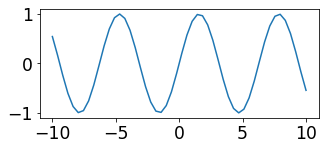

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-06-28'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.8.4'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor, dumpParameters, FullForwardModelFitWorkspace,  run_ffm_minimisation, plot_comparison_truth
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [13]:
from time import sleep

In [14]:
from astropy.time import Time
import astropy.units as u

In [15]:
import pickle

# Function

In [16]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [17]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [19]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [20]:
# path index for each month
DATE="20220317"
#DATE="20211104"
filterdispersername = "empty~holo4_003"
#filterdispersername = "BG40~holo4_003"
imagemode = "postISRCCD"
#imagemode = "unflattened"

In [21]:
version="v5.0"

In [22]:
# Choose the config filename
list_of_spectractorconfigfiles= ['auxtel_config_holo_DECONVOLUTION_PSF1D.ini' ,
                                 'auxtel_config_holo_DECONVOLUTION_PSF2D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_FFM.ini',
                                 'auxtel_config_holo_DECONVOLUTION_PSF2DFFM.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF2D.ini']
config_idx = 4
configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
#configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]
configdir = "config_" + (list_of_spectractorconfigfiles[config_idx].split("auxtel_config_holo_")[-1]).split(".") [0]

In [23]:
configdir 

'config_DECONVOLUTION_REBIN2PSF1D'

In [24]:
load_config(configfilename)

In [25]:
dumpParameters()

ASTROMETRYNET_DIR 
BGD_ORDER 1
CALIB_BGD_NPARAMS 4
CALIB_BGD_ORDER 3
CALIB_BGD_WIDTH 15
CALIB_PEAK_WIDTH 7
CALIB_SAVGOL_ORDER 2
CALIB_SAVGOL_WINDOW 5
CCD_ARCSEC2RADIANS 4.84813681109536e-06
CCD_GAIN 1.1
CCD_IMSIZE 2048
CCD_MAXADU 170000
CCD_PIXEL2ARCSEC 0.1904
CCD_PIXEL2MM 0.02
CCD_REBIN 2
CONFIG_DIR /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/../config/
DEBUG False
DEBUG_LOGGING False
DISPERSER_DIR /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/
DISPLAY False
DISTANCE2CCD 175
DISTANCE2CCD_ERR 0.75
FGB37 {'label': 'FGB37', 'min': 350, 'max': 750}
FILTERS [{'label': 'RG715', 'min': 690, 'max': 1100}, {'label': 'FGB37', 'min': 350, 'max': 750}, {'label': 'Halfa', 'min': 0.0006431, 'max': 0.0006686999999999999}, {'label': 'Z-Gunn', 'min': 800, 'max': 1100}]
FLAM_TO_ADURATE 5175865186660.421
GRATING_ORDER_2OVER1 0.1
GROOVES_PER_MM 350
HAL

In [26]:
configmode = list_of_spectractorconfigfiles[config_idx].split("auxtel_config_holo_DECONVOLUTION_")[-1].split(".") [0]
configmode

'REBIN2PSF1D'

# Path

In [27]:
HOSTCC=True

In [28]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
        path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
        path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)

else:
    path_auxtel="/Users/sylvie/DATA/AuxTelData2022"
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
        path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
        path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)


In [29]:
path_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317'

In [30]:
! ls -l $path_output_spectractor

total 0
drwxrws--- 1 dagoret lsst 2 Jun 28 14:36 2022031700237


In [31]:
# standard configuration for spectractor
#config = os.path.join(path_spectractor_config,"auxtel.ini")
#config=os.path.join("./config",configfilename)
config=configfilename
print(f">>>>> Spectractor configuration filename : {configfilename}")

>>>>> Spectractor configuration filename : ./config/auxtel_config_holo_DECONVOLUTION_REBIN2PSF1D.ini


In [32]:
load_config(configfilename)

## Logbook for file selection

In [33]:
filename_logbook='logbooks/auxtellogbook_'+filterdispersername+"_"+DATE+'_' + version+'.csv'

In [34]:
df=pd.read_csv(filename_logbook,index_col=0)

In [35]:
pd.set_option('display.max_rows', None)

In [36]:
df

index                     date  \
0       0  2022-03-18T00:51:03.112   
1       1  2022-03-18T00:51:36.190   
2       2  2022-03-18T00:54:30.463   
3       3  2022-03-18T00:55:03.377   
4       4  2022-03-18T00:58:01.707   
5       5  2022-03-18T00:58:34.835   
6       6  2022-03-18T01:01:32.859   
7       7  2022-03-18T01:02:05.775   
8       8  2022-03-18T01:05:03.839   
9       9  2022-03-18T01:05:36.766   
10     10  2022-03-18T01:08:32.232   
11     11  2022-03-18T01:09:05.133   
12     12  2022-03-18T01:12:00.164   
13     13  2022-03-18T01:12:33.079   
14     14  2022-03-18T01:15:32.735   
15     15  2022-03-18T01:16:05.627   
16     16  2022-03-18T01:18:59.663   
17     17  2022-03-18T01:19:32.577   
18     18  2022-03-18T01:22:30.386   
19     19  2022-03-18T01:23:03.286   
20     20  2022-03-18T01:43:39.078   
21     21  2022-03-18T01:44:11.982   
22     22  2022-03-18T01:47:06.515   
23     23  2022-03-18T01:47:39.407   
24     24  2022-03-18T01:50:33.593   
25     25  2022-03-18T01:51:06.516   
26     26  2022-03-18T01:54:00.883   
27     27  2022-03-18T01:54:33.856   
28     28  2022-03-18T01:57:30.505   
29     29  2022-03-18T01:58:03.446   
30     30  2022-03-18T02:01:00.181   
31     31  2022-03-18T02:01:33.339   
32     32  2022-03-18T02:04:30.946   
33     33  2022-03-18T02:05:03.843   
34     34  2022-03-18T02:08:03.232   
35     35  2022-03-18T02:08:36.262   
36     36  2022-03-18T02:11:34.200   
37     37  2022-03-18T02:12:07.156   
38     38  2022-03-18T02:15:00.952   
39     39  2022-03-18T02:15:33.886   
40     40  2022-03-18T02:33:14.260   
41     41  2022-03-18T02:33:47.167   
42     42  2022-03-18T02:36:45.029   
43     43  2022-03-18T02:37:17.962   
44     44  2022-03-18T02:40:14.985   
45     45  2022-03-18T02:40:47.930   
46     46  2022-03-18T02:43:46.361   
47     47  2022-03-18T02:44:19.255   
48     48  2022-03-18T02:47:16.976   
49     49  2022-03-18T02:47:49.912   
50     50  2022-03-18T02:50:52.460   
51     51  2022-03-18T02:51:25.626   
52     52  2022-03-18T03:08:55.717   
53     53  2022-03-18T03:09:28.629   
54     54  2022-03-18T03:13:08.467   
55     55  2022-03-18T03:13:41.360   
56     56  2022-03-18T03:17:20.920   
57     57  2022-03-18T03:17:53.934   
58     58  2022-03-18T03:21:41.018   
59     59  2022-03-18T03:22:14.022   

                                                 path  \
0   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
1   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
2   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
3   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
4   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
5   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
6   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
7   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
8   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
9   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
10  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
11  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
12  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
13  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
14  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
15  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
16  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
17  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
18  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
19  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
20  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
21  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
22  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
23  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
24  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
25  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
26  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
27  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
28  /sps/lsst/groups/auxtel/data

## Selection of input files

In [37]:
# Do not consider flag
#df_good=df[df["quality"]==1]

In [38]:
df_good=df
df_good["quality"] = 1

In [39]:
for spectra_file in df_good["file"]:
    print(spectra_file)

exposure_2022031700237_postisrccd.fits
exposure_2022031700238_postisrccd.fits
exposure_2022031700244_postisrccd.fits
exposure_2022031700245_postisrccd.fits
exposure_2022031700251_postisrccd.fits
exposure_2022031700252_postisrccd.fits
exposure_2022031700258_postisrccd.fits
exposure_2022031700259_postisrccd.fits
exposure_2022031700265_postisrccd.fits
exposure_2022031700266_postisrccd.fits
exposure_2022031700272_postisrccd.fits
exposure_2022031700273_postisrccd.fits
exposure_2022031700279_postisrccd.fits
exposure_2022031700280_postisrccd.fits
exposure_2022031700286_postisrccd.fits
exposure_2022031700287_postisrccd.fits
exposure_2022031700293_postisrccd.fits
exposure_2022031700294_postisrccd.fits
exposure_2022031700300_postisrccd.fits
exposure_2022031700301_postisrccd.fits
exposure_2022031700309_postisrccd.fits
exposure_2022031700310_postisrccd.fits
exposure_2022031700316_postisrccd.fits
exposure_2022031700317_postisrccd.fits
exposure_2022031700323_postisrccd.fits
exposure_2022031700324_po

## Selection of Spectractor output files

In [40]:
# total number of exposures
NBEXP=0
# total number of exposures without dir
NBEXPNODIR=0
# total number of exposures with dir
NBEXPWTHDIR=0
# total number of exposures with plots
NBEXPWTHPLT=0
# total number of exposures with spectra
NBEXPWTHSPEC=0

# list of exposures
LISTNUM=[]
# list of exposure without dir (not run spectraction)
LISTNUMNODIR=[]
# list of exposure with dir (spectraction has been run)
LISTNUMWTHDIR=[]
# list of exposures with plots (Spectractor has run up to some point)
LISTNUMWTHPLOTS=[]
# list of exposures with spectraction output (Spectractor has completed)
LISTNUMWTHSPECTR=[]

# list of selected spectra path
List_of_spectra_path=[]

In [41]:
list_of_files=os.listdir(path_output_spectractor)
list_of_files=sorted(list_of_files)


print("list of subdir found ",list_of_files)

for subdir in list_of_files:
    
    
    #tag = file_tag_forsorting(subdir)
    tag = subdir_tag_forsorting(subdir)
    
        
    print(tag)    
    #if tag is not None and int(tag)<317:
    #    continue
    if tag is None :
        continue
  
    
    
    fulldir=os.path.join(path_output_spectractor,subdir)



    if not os.path.isdir(fulldir):
        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is not a directory".format(subdir))
        

        NBEXPNODIR+=1


    else:

        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is a directory".format(subdir))

        tagname=subdir_tag_forsorting(subdir)
        print("tagname= {}".format(tagname))
        #targetname=file_target(subdir)
        #print("targetname= {}".format(targetname))
        



        NBEXP += 1
        LISTNUM.append(tagname)



        dir_plots=os.path.join(fulldir,"plots")
        dir_spectration = os.path.join(fulldir, "basespec")

        flag_empty1 = True
        flag_empty2 = True


        if os.path.isdir(dir_plots):
            if any(os.scandir(dir_plots)):
                print("dir_plots is not empty")
                NBEXPWTHPLT+=1
                LISTNUMWTHPLOTS.append(tagname)
                flag_empty1 = False

            else:
                print("dir_plots is empty")


        if os.path.isdir(dir_spectration):
            if any(os.scandir(dir_spectration)):
                print("dir_spectration is not empty")
                NBEXPWTHSPEC+=1
                LISTNUMWTHSPECTR.append(tagname)
                flag_empty2 = False
                List_of_spectra_path.append(dir_spectration)

            else:
                print("dir_spectration is empty")

        if flag_empty1 and flag_empty2 :
            NBEXPNODIR+=1
            LISTNUMNODIR.append(tagname)
        else:
            NBEXPWTHDIR += 1
            LISTNUMWTHDIR.append(tagname)



print("-----------------------------------------------------------------")


#LISTNUM=sorted(LISTNUM)
#LISTNUMNODIR=sorted(LISTNUMNODIR)
#LISTNUMWTHDIR=sorted(LISTNUMWTHDIR)
#LISTNUMWTHPLOTS=sorted(LISTNUMWTHPLOTS)
#LISTNUMWTHSPECTR=sorted(LISTNUMWTHSPECTR)
List_of_spectra_path=sorted(List_of_spectra_path)

print("Full list of Exposures : .......................{}".format(LISTNUM))
print("Full list of Exposures without output dir: .....{}".format(LISTNUMNODIR))
print("Full list of Exposures with output dir: ....... {}".format(LISTNUMWTHDIR))
print("Full list of Exposures with output plots: ..... {}".format(LISTNUMWTHPLOTS))
print("Full list of Exposures with output spectra: ....{}".format(LISTNUMWTHSPECTR))




print("Total number of exposures : .....................{}".format(NBEXP))
print("Total number of exposures without dir : .........{}".format(NBEXPNODIR))
print("Total number of exposures with dir :.............{}".format(NBEXPWTHDIR))
print("Total number of exposures with plots : ..........{}".format(NBEXPWTHPLT))
print("Total number of exposures with spectra: .........{}".format(NBEXPWTHSPEC))


list of subdir found  ['2022031700237']
00237
---------------------------------------------
2022031700237  	   00237
2022031700237 is a directory
tagname= 00237
dir_plots is not empty
dir_spectration is not empty
-----------------------------------------------------------------
Full list of Exposures : .......................['00237']
Full list of Exposures without output dir: .....[]
Full list of Exposures with output dir: ....... ['00237']
Full list of Exposures with output plots: ..... ['00237']
Full list of Exposures with output spectra: ....['00237']
Total number of exposures : .....................1
Total number of exposures without dir : .........0
Total number of exposures with dir :.............1
Total number of exposures with plots : ..........1
Total number of exposures with spectra: .........1


In [42]:
#dir_spectra="outputs_reprocess"
print(List_of_spectra_path)

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec']


In [43]:
config

'./config/auxtel_config_holo_DECONVOLUTION_REBIN2PSF1D.ini'

## Extraction of spectra

In [44]:
all_files_spectra = []
all_files_spectrogram = []
all_files_lines = []
all_files_table = []

# loop on topdir
for dir_spectra in List_of_spectra_path:
    for filename in os.listdir(dir_spectra):
        if re.search("_spectrum.fits$",filename):
            the_file_spectrum=os.path.join(dir_spectra,filename)
            all_files_spectra.append(the_file_spectrum)
            the_file_spectrogram=the_file_spectrum.replace("_spectrum","_spectrogram")
            all_files_spectrogram.append(the_file_spectrogram)
            the_file_lines=the_file_spectrum.replace("_spectrum.fits","_lines.csv")
            all_files_lines.append(the_file_lines)
            the_file_table=the_file_spectrum.replace("_spectrum.fits","_table.csv")
            all_files_table.append(the_file_table)
    

In [45]:
all_files_spectra[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum.fits']

In [46]:
all_files_spectrogram[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrogram.fits']

In [47]:
all_files_lines[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_lines.csv']

In [48]:
all_files_table[:3] 

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_table.csv']

## Selection of good spectra

In [49]:
all_good_spectra_spectrum_files = sorted(all_files_spectra)

In [50]:
N=len(all_good_spectra_spectrum_files)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

## All Spectra

In [51]:
all_num=[]
idx=0
for fullfilename in all_good_spectra_spectrum_files:
    filename= os.path.basename(fullfilename)
    tag=file_tag_forsorting(filename.split(".")[0])
    all_num.append(tag)
    idx+=1
    
    

In [52]:
if False:
    parameters.DISPLAY=True

    FLAG_ORDER2 = True

    infos = []
    all_lambdas=[]
    all_data=[]
    all_data_err=[]

    if FLAG_ORDER2:
        all_lambdas_order2=[]
        all_data_order2=[]
        all_data_err_order2=[]

    all_num=[]
    all_figs = []


    idx=0
    for fullfilename in all_good_spectra_spectrum_files:
    
        filename = os.path.basename(fullfilename)
        print(idx,")",filename," ",fullfilename)
    
    
        fig=plt.figure(figsize=(16,4))
        ax1 = fig.add_subplot(1, 2, 1)
    
        filename= os.path.basename(fullfilename)
        tag=file_tag_forsorting(filename.split(".")[0])
        all_num.append(tag)
    
   
     
        s=Spectrum(fullfilename, config=config,fast_load=False)
        label=filename.split('.')[0]+" "
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
        all_lambdas.append(s.lambdas)
        all_data.append(s.data)
        all_data_err.append(s.err)
    
        if FLAG_ORDER2:
            all_lambdas_order2.append(s.lambdas_order2)
            all_data_order2.append(s.data_order2)
            all_data_err_order2.append(s.err_order2)
    
        ax2 = fig.add_subplot(1, 2, 2)
    
        fullfilename2=all_files_spectrogram[idx]
    
        s.load_spectrogram(fullfilename2)
        s.plot_spectrogram(ax=ax2,scale="log")
    
    
        infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
        plt.show()
        all_figs.append(fig)
    
        idx+=1
    

## View one spectrum

0 ) exposure_2022031700237_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum.fits


2022-06-28 15:47:38  astropy    _showwarning         WARNING AstropyDeprecationWarning: The update_default_config function is deprecated and may be removed in a future version.


set date_obs to 2022-03-18T00:50:48.964
set expo to 20.0
set airmass to 1.11445296512311
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to -0.28
set dec to -32.3064444444444
set hour_angle to 30.73762446363224
set temperature to 8.9
set pressure to 743.45
set humidity to 48.0
set lambda_ref to 631.9145079684116
set parallactic_angle to 93.74272252137011


2022-06-28 15:47:39  astropy    _showwarning         WARNING AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead.


target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                           
--------- ------------- ------------- ... --------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ... 0.0003640                1


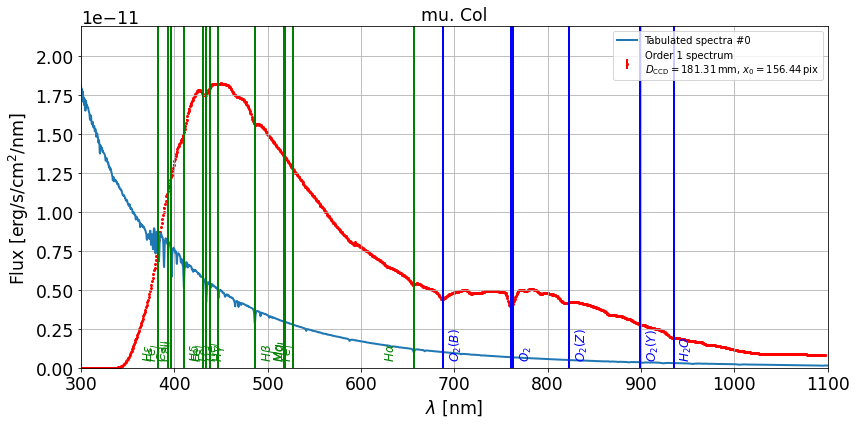

In [53]:
idx=0

fullfilename = all_good_spectra_spectrum_files[idx]
    
filename = os.path.basename(fullfilename)
print(idx,")",filename," ",fullfilename)
    
    
fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 1, 1)
    
filename= os.path.basename(fullfilename)
tag=file_tag_forsorting(filename.split(".")[0])
all_num.append(tag)
    
   
     
s=Spectrum(fullfilename, config=config,fast_load=False)
label=filename.split('.')[0]+" "
#s.plot_spectrum(ax=ax1,force_lines=True,label=label)
s.plot_spectrum(ax=ax1,force_lines=True)
    
    
#ax2 = fig.add_subplot(1, 2, 2)
    
#fullfilename2=all_files_spectrogram[idx]
    
#s.load_spectrogram(fullfilename2)
#s.plot_spectrogram(ax=ax2,scale="log")
    

plt.show()
    

In [54]:
from spectractor.simulation.adr import adr_calib, flip_and_rotate_adr_to_image_xy_coordinates

In [55]:
fig_FFMpoutputdir = "fig_FFM_" + configdir
if not os.path.exists(fig_FFMpoutputdir):
        os.makedirs(fig_FFMpoutputdir)

In [56]:
parameters.DISPLAY = True
parameters.DEBUG = True
parameters.VERBOSE = True
parameters.LSST_SAVEFIGPATH = fig_FFMpoutputdir

In [57]:
# Want to plot some information
# if 'LBDAS_T' in spec.header: plot_comparison_truth(spec, w)
s.header['LBDAS_T'] = True

In [58]:
w = FullForwardModelFitWorkspace(s, verbose=parameters.VERBOSE, plot=True, live_fit=True,
                                         amplitude_priors_method="spectrum")

2022-06-28 15:47:44  FullForwardModelFitWorkspace __init__             INFO   
	Full forward model fitting with regularisation parameter r=1.


2022-06-28 15:48:33  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=2.2837e+08 initial chisq_red=5476.5
		 Line search: alpha_min=2.08 iter=0 funcalls=5
	Parameter shifts: [ 8.25585851e+00 -3.19189015e-04]
	New parameters: [ 8.25585851 -0.28031919]
	Final cost=6.845e+07 final chisq_red=1641.5 computed in 41.26s
2022-06-28 15:48:39  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-06-28 15:48:41  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-06-28 15:49:23  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=6.845e+07 initial chisq_red=1641.5
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [-8.88173243  0.53767028]
	New parameters: [-0.62587392  0.25735109]
	Final cost=2.3645e+07 final chisq_red=567.04 computed in 40.91s
2022-06-28 15:49:29

	 >>>>> cov =  [[ 2.87542384e-07 -1.02656934e-08]
 [-1.02656934e-08  6.67277358e-10]] >>>>  cov.shape =  (2, 2)


2022-06-28 15:51:10  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.5052 +0.0005 -0.0005
	angle [deg]: 0.25892 +3e-05 -3e-05
	
2022-06-28 15:51:17  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-06-28 15:51:18  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-06-28 15:51:19  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_correlation.pdf.
2022-06-28 15:51:20  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/parameters_correlation.pdf.


>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 2.87542384e-07 -1.02656934e-08]
 [-1.02656934e-08  6.67277358e-10]]  type =  <class 'numpy.ndarray'>  shape =  (2, 2)
>>>> 	 	  k =  0
>>>>> 	 save_parameters_summary ::  k =  0  ,  ip =  3  p[ip] =  -0.5051572471552435  , label =  shift_y [pix]  , cov =  2.8754238403013665e-07
>>>> 	 	  k =  1
>>>>> 	 save_parameters_summary ::  k =  1  ,  ip =  4  p[ip] =  0.2589236294891178  , label =  angle [deg]  , cov =  6.672773581160957e-10
>>>> 	 	  k =  2
>>>>> 	 save_parameters_summary ::  SKIP k =  2  >=  kmax =  2
>>>> 	 	  k =  3
>>>>> 	 save_parameters_summary ::  SKIP k =  3  >=  kmax =  2
>>>> 	 	  k =  4
>>>>> 	 save_parameters_summary ::  SKIP k =  4  >=  kmax =  2
>>>> 	 	  k 

2022-06-28 15:51:20  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-06-28 15:51:20  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-06-28 15:51:26  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-06-28 15:51:27  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-06-28 15:51:28  spectractor.extractor.extractor run_ffm_minimisation INFO  

	 >>>>> cov =  [[ 1.01507794e-06 -5.92213272e-08 -2.68750124e-08 -6.37073686e-08
   1.65831560e-08 -1.08178589e-08 -2.42569018e-08  2.67419083e-09]
 [-5.92213272e-08  3.73014926e-09  1.29820780e-09  6.48844064e-09
  -1.42310265e-09  5.47272474e-10  2.45817595e-09 -4.44813096e-10]
 [-2.68750124e-08  1.29820780e-09  4.37737878e-06  1.19753650e-06
   7.18512292e-06  1.38055260e-06  3.06579033e-07  2.25361870e-06]
 [-6.37073686e-08  6.48844064e-09  1.19753650e-06  1.47946630e-05
   6.63992645e-07  3.08530676e-07  4.68102840e-06  6.76271560e-08]
 [ 1.65831560e-08 -1.42310265e-09  7.18512292e-06  6.63992645e-07
   3.41789049e-05  2.25264877e-06  5.58146585e-08  1.08476418e-05]
 [-1.08178589e-08  5.47272474e-10  1.38055260e-06  3.08530676e-07
   2.25264877e-06  4.61649101e-07  8.53207677e-08  7.45920629e-07]
 [-2.42569018e-08  2.45817595e-09  3.06579033e-07  4.68102840e-06
   5.58146585e-08  8.53207677e-08  1.57101632e-06 -1.86125330e-08]
 [ 2.67419083e-09 -4.44813096e-10  2.25361870e-06  6.7

2022-06-28 15:56:29  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.313 +0.001 -0.001
	angle [deg]: 0.23587 +6e-05 -6e-05
	gamma_0: 6.216 +0.002 -0.002
	gamma_1: -1.710 +0.004 -0.004
	gamma_2: 1.340 +0.006 -0.006
	alpha_0: 2.3473 +0.0007 -0.0007
	alpha_1: -0.399 +0.001 -0.001
	alpha_2: 0.190 +0.002 -0.002
	
2022-06-28 15:56:36  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-06-28 15:56:38  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-06-28 15:56:39  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_correlation.pdf.
2022-06-28 15:56:39  FullForwardModelFitWorkspace plot_correlatio

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.01507794e-06 -5.92213272e-08 -2.68750124e-08 -6.37073686e-08
   1.65831560e-08 -1.08178589e-08 -2.42569018e-08  2.67419083e-09]
 [-5.92213272e-08  3.73014926e-09  1.29820780e-09  6.48844064e-09
  -1.42310265e-09  5.47272474e-10  2.45817595e-09 -4.44813096e-10]
 [-2.68750124e-08  1.29820780e-09  4.37737878e-06  1.19753650e-06
   7.18512292e-06  1.38055260e-06  3.06579033e-07  2.25361870e-06]
 [-6.37073686e-08  6.48844064e-09  1.19753650e-06  1.47946630e-05
   6.63992645e-07  3.08530676e-07  4.68102840e-06  6.76271560e-08]
 [ 1.65831560e-08 -1.42310265e-09  7.18512292e-06  6.63992645e-07
   3.41789049e-05  2.25264877e-06  5.58146585e-08  1.08476418e-05]
 [-1.08178589e-08  5.47272

2022-06-28 15:56:39  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-06-28 15:56:40  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-06-28 15:58:20  RegFitWorkspace print_regularisation_summary INFO   
	Optimal regularisation parameter: 1.7841752066117378
	Tr(R) = 166.32597340429257
	N_params = 1152
	N_data = 41700 (without mask and outliers)
2022-06-28 15:59:26  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=5.2066e+05 initial chisq_red=12.526
		 Line search: alpha_min=1 i

	 >>>>> cov =  [[ 1.01491922e-06 -5.92137233e-08 -2.77599446e-08 -6.69302266e-08
   1.66616381e-08 -1.11234878e-08 -2.53512050e-08  2.76586977e-09]
 [-5.92137233e-08  3.72973707e-09  1.36542975e-09  6.74297451e-09
  -1.43057180e-09  5.70340646e-10  2.54518184e-09 -4.51025163e-10]
 [-2.77599446e-08  1.36542975e-09  4.37590442e-06  1.20267082e-06
   7.16004046e-06  1.38037305e-06  3.09754163e-07  2.24457357e-06]
 [-6.69302266e-08  6.74297451e-09  1.20267082e-06  1.48014796e-05
   6.51313406e-07  3.11723971e-07  4.68467993e-06  6.53001415e-08]
 [ 1.66616381e-08 -1.43057180e-09  7.16004046e-06  6.51313406e-07
   3.41435057e-05  2.24347522e-06  5.35606227e-08  1.08384235e-05]
 [-1.11234878e-08  5.70340646e-10  1.38037305e-06  3.11723971e-07
   2.24347522e-06  4.61684482e-07  8.69062756e-08  7.42562876e-07]
 [-2.53512050e-08  2.54518184e-09  3.09754163e-07  4.68467993e-06
   5.35606227e-08  8.69062756e-08  1.57266952e-06 -1.87120992e-08]
 [ 2.76586977e-09 -4.51025163e-10  2.24457357e-06  6.5

2022-06-28 16:00:34  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.312 +0.001 -0.001
	angle [deg]: 0.23583 +6e-05 -6e-05
	gamma_0: 6.212 +0.002 -0.002
	gamma_1: -1.711 +0.004 -0.004
	gamma_2: 1.343 +0.006 -0.006
	alpha_0: 2.3450 +0.0007 -0.0007
	alpha_1: -0.400 +0.001 -0.001
	alpha_2: 0.191 +0.002 -0.002
	
2022-06-28 16:00:40  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-06-28 16:00:42  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-06-28 16:00:43  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_correlation.pdf.
2022-06-28 16:00:43  FullForwardModelFitWorkspace plot_correlatio

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.01491922e-06 -5.92137233e-08 -2.77599446e-08 -6.69302266e-08
   1.66616381e-08 -1.11234878e-08 -2.53512050e-08  2.76586977e-09]
 [-5.92137233e-08  3.72973707e-09  1.36542975e-09  6.74297451e-09
  -1.43057180e-09  5.70340646e-10  2.54518184e-09 -4.51025163e-10]
 [-2.77599446e-08  1.36542975e-09  4.37590442e-06  1.20267082e-06
   7.16004046e-06  1.38037305e-06  3.09754163e-07  2.24457357e-06]
 [-6.69302266e-08  6.74297451e-09  1.20267082e-06  1.48014796e-05
   6.51313406e-07  3.11723971e-07  4.68467993e-06  6.53001415e-08]
 [ 1.66616381e-08 -1.43057180e-09  7.16004046e-06  6.51313406e-07
   3.41435057e-05  2.24347522e-06  5.35606227e-08  1.08384235e-05]
 [-1.11234878e-08  5.70340

2022-06-28 16:00:44  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-06-28 16:00:44  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-06-28 16:00:44  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-06-28 16:00:44  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Newton: total computation time: 556.2398071289062s
2022-06-28 16:00:45  FullForwardModelFitWorkspace plot_fit             INFO   
	Save 

	 >>>>> cov =  [[ 1.01435583e-06 -5.92189643e-08 -2.77753240e-08 -6.53457199e-08
   1.47915041e-08 -1.11206615e-08 -2.48154622e-08  2.22985181e-09]
 [-5.92189643e-08  3.73249616e-09  1.35936040e-09  6.63563068e-09
  -1.33647811e-09  5.67770920e-10  2.50838614e-09 -4.24855938e-10]
 [-2.77753240e-08  1.35936040e-09  4.38162344e-06  1.20844174e-06
   7.17714392e-06  1.38193871e-06  3.11159954e-07  2.24955691e-06]
 [-6.53457199e-08  6.63563068e-09  1.20844174e-06  1.48131030e-05
   6.71495547e-07  3.13119240e-07  4.68769149e-06  7.06777791e-08]
 [ 1.47915041e-08 -1.33647811e-09  7.17714392e-06  6.71495547e-07
   3.41630300e-05  2.24831312e-06  5.92286607e-08  1.08433080e-05]
 [-1.11206615e-08  5.67770920e-10  1.38193871e-06  3.13119240e-07
   2.24831312e-06  4.62135249e-07  8.72695949e-08  7.44061935e-07]
 [-2.48154622e-08  2.50838614e-09  3.11159954e-07  4.68769149e-06
   5.92286607e-08  8.72695949e-08  1.57349773e-06 -1.70633826e-08]
 [ 2.22985181e-09 -4.24855938e-10  2.24955691e-06  7.0

2022-06-28 16:03:26  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.311 +0.001 -0.001
	angle [deg]: 0.23563 +6e-05 -6e-05
	gamma_0: 6.211 +0.002 -0.002
	gamma_1: -1.711 +0.004 -0.004
	gamma_2: 1.340 +0.006 -0.006
	alpha_0: 2.3449 +0.0007 -0.0007
	alpha_1: -0.400 +0.001 -0.001
	alpha_2: 0.191 +0.002 -0.002
	
/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/extractor.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(18, 10), gridspec_kw=gs_kw)
2022-06-28 16:03:33  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-06-28 16:03:35  Full

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.01435583e-06 -5.92189643e-08 -2.77753240e-08 -6.53457199e-08
   1.47915041e-08 -1.11206615e-08 -2.48154622e-08  2.22985181e-09]
 [-5.92189643e-08  3.73249616e-09  1.35936040e-09  6.63563068e-09
  -1.33647811e-09  5.67770920e-10  2.50838614e-09 -4.24855938e-10]
 [-2.77753240e-08  1.35936040e-09  4.38162344e-06  1.20844174e-06
   7.17714392e-06  1.38193871e-06  3.11159954e-07  2.24955691e-06]
 [-6.53457199e-08  6.63563068e-09  1.20844174e-06  1.48131030e-05
   6.71495547e-07  3.13119240e-07  4.68769149e-06  7.06777791e-08]
 [ 1.47915041e-08 -1.33647811e-09  7.17714392e-06  6.71495547e-07
   3.41630300e-05  2.24831312e-06  5.92286607e-08  1.08433080e-05]
 [-1.11206615e-08  5.67770

2022-06-28 16:03:37  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-06-28 16:03:37  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-06-28 16:03:37  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-06-28 16:03:37  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Newton: total computation time: 728.3827085494995s
2022-06-28 16:03:37  FullForwardModelFitWorkspace plot_fit             INFO   
	Save 

	 >>>>> cov =  [[ 1.01424982e-06 -5.92060471e-08 -2.75627575e-08 -6.48168645e-08
   1.48172699e-08 -1.10446118e-08 -2.46204632e-08  2.26438411e-09]
 [-5.92060471e-08  3.73117899e-09  1.34407039e-09  6.58166383e-09
  -1.33342855e-09  5.62464380e-10  2.48912499e-09 -4.24262640e-10]
 [-2.75627575e-08  1.34407039e-09  4.38061672e-06  1.20873967e-06
   7.17266809e-06  1.38166530e-06  3.11333781e-07  2.24813111e-06]
 [-6.48168645e-08  6.58166383e-09  1.20873967e-06  1.48110496e-05
   6.72512624e-07  3.13360492e-07  4.68725379e-06  7.11022457e-08]
 [ 1.48172699e-08 -1.33342855e-09  7.17266809e-06  6.72512624e-07
   3.41503004e-05  2.24686879e-06  5.94162275e-08  1.08396774e-05]
 [-1.10446118e-08  5.62464380e-10  1.38166530e-06  3.13360492e-07
   2.24686879e-06  4.62058242e-07  8.73713251e-08  7.43575685e-07]
 [-2.46204632e-08  2.48912499e-09  3.11333781e-07  4.68725379e-06
   5.94162275e-08  8.73713251e-08  1.57342568e-06 -1.69945222e-08]
 [ 2.26438411e-09 -4.24262640e-10  2.24813111e-06  7.1

2022-06-28 16:05:37  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.311 +0.001 -0.001
	angle [deg]: 0.23546 +6e-05 -6e-05
	gamma_0: 6.211 +0.002 -0.002
	gamma_1: -1.710 +0.004 -0.004
	gamma_2: 1.338 +0.006 -0.006
	alpha_0: 2.3449 +0.0007 -0.0007
	alpha_1: -0.400 +0.001 -0.001
	alpha_2: 0.190 +0.002 -0.002
	
2022-06-28 16:05:42  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-06-28 16:05:44  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-06-28 16:05:45  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_correlation.pdf.
2022-06-28 16:05:45  FullForwardModelFitWorkspace plot_correlatio

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.01424982e-06 -5.92060471e-08 -2.75627575e-08 -6.48168645e-08
   1.48172699e-08 -1.10446118e-08 -2.46204632e-08  2.26438411e-09]
 [-5.92060471e-08  3.73117899e-09  1.34407039e-09  6.58166383e-09
  -1.33342855e-09  5.62464380e-10  2.48912499e-09 -4.24262640e-10]
 [-2.75627575e-08  1.34407039e-09  4.38061672e-06  1.20873967e-06
   7.17266809e-06  1.38166530e-06  3.11333781e-07  2.24813111e-06]
 [-6.48168645e-08  6.58166383e-09  1.20873967e-06  1.48110496e-05
   6.72512624e-07  3.13360492e-07  4.68725379e-06  7.11022457e-08]
 [ 1.48172699e-08 -1.33342855e-09  7.17266809e-06  6.72512624e-07
   3.41503004e-05  2.24686879e-06  5.94162275e-08  1.08396774e-05]
 [-1.10446118e-08  5.62464

2022-06-28 16:05:46  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-06-28 16:05:46  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-06-28 16:05:46  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-06-28 16:05:46  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Newton: total computation time: 857.7587258815765s
2022-06-28 16:05:47  FullForwardModelFitWorkspace plot_fit             INFO   
	Save 

	 >>>>> cov =  [[ 1.01420736e-06 -5.92049094e-08 -2.74470330e-08 -6.45998932e-08
   1.54058714e-08 -1.10086765e-08 -2.45573344e-08  2.46726332e-09]
 [-5.92049094e-08  3.73121587e-09  1.34110814e-09  6.57141969e-09
  -1.35030440e-09  5.61620060e-10  2.48619817e-09 -4.30331936e-10]
 [-2.74470330e-08  1.34110814e-09  4.38110863e-06  1.21244533e-06
   7.17296522e-06  1.38184011e-06  3.12725712e-07  2.24815595e-06]
 [-6.45998932e-08  6.57141969e-09  1.21244533e-06  1.48139199e-05
   6.78270086e-07  3.14761727e-07  4.68820719e-06  7.33734295e-08]
 [ 1.54058714e-08 -1.35030440e-09  7.17296522e-06  6.78270086e-07
   3.41584294e-05  2.24694983e-06  6.15530098e-08  1.08423107e-05]
 [-1.10086765e-08  5.61620060e-10  1.38184011e-06  3.14761727e-07
   2.24694983e-06  4.62122918e-07  8.79028759e-08  7.43578858e-07]
 [-2.45573344e-08  2.48619817e-09  3.12725712e-07  4.68820719e-06
   6.15530098e-08  8.79028759e-08  1.57375223e-06 -1.61475541e-08]
 [ 2.46726332e-09 -4.30331936e-10  2.24815595e-06  7.3

2022-06-28 16:07:51  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.311 +0.001 -0.001
	angle [deg]: 0.23547 +6e-05 -6e-05
	gamma_0: 6.211 +0.002 -0.002
	gamma_1: -1.710 +0.004 -0.004
	gamma_2: 1.338 +0.006 -0.006
	alpha_0: 2.3449 +0.0007 -0.0007
	alpha_1: -0.400 +0.001 -0.001
	alpha_2: 0.190 +0.002 -0.002
	
2022-06-28 16:07:55  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-06-28 16:07:57  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-06-28 16:07:58  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_correlation.pdf.
2022-06-28 16:07:59  FullForwardModelFitWorkspace plot_correlatio

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.01420736e-06 -5.92049094e-08 -2.74470330e-08 -6.45998932e-08
   1.54058714e-08 -1.10086765e-08 -2.45573344e-08  2.46726332e-09]
 [-5.92049094e-08  3.73121587e-09  1.34110814e-09  6.57141969e-09
  -1.35030440e-09  5.61620060e-10  2.48619817e-09 -4.30331936e-10]
 [-2.74470330e-08  1.34110814e-09  4.38110863e-06  1.21244533e-06
   7.17296522e-06  1.38184011e-06  3.12725712e-07  2.24815595e-06]
 [-6.45998932e-08  6.57141969e-09  1.21244533e-06  1.48139199e-05
   6.78270086e-07  3.14761727e-07  4.68820719e-06  7.33734295e-08]
 [ 1.54058714e-08 -1.35030440e-09  7.17296522e-06  6.78270086e-07
   3.41584294e-05  2.24694983e-06  6.15530098e-08  1.08423107e-05]
 [-1.10086765e-08  5.61620

2022-06-28 16:08:00  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-06-28 16:08:00  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-06-28 16:08:00  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-06-28 16:08:00  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Newton: total computation time: 991.4084675312042s
2022-06-28 16:08:01  FullForwardModelFitWorkspace plot_fit             INFO   
	Save 

	 >>>>> cov =  [[ 1.01430148e-06 -5.92094947e-08 -2.76309436e-08 -6.45857226e-08
   1.45893179e-08 -1.10689481e-08 -2.45477011e-08  2.19308046e-09]
 [-5.92094947e-08  3.73142776e-09  1.34797416e-09  6.57015483e-09
  -1.31965544e-09  5.63881823e-10  2.48556581e-09 -4.19926862e-10]
 [-2.76309436e-08  1.34797416e-09  4.38110179e-06  1.21247785e-06
   7.17330496e-06  1.38185815e-06  3.12757723e-07  2.24828752e-06]
 [-6.45857226e-08  6.57015483e-09  1.21247785e-06  1.48118981e-05
   6.79528711e-07  3.14808213e-07  4.68762571e-06  7.38380742e-08]
 [ 1.45893179e-08 -1.31965544e-09  7.17330496e-06  6.79528711e-07
   3.41605386e-05  2.24715237e-06  6.20332747e-08  1.08429808e-05]
 [-1.10689481e-08  5.63881823e-10  1.38185815e-06  3.14808213e-07
   2.24715237e-06  4.62135592e-07  8.79249107e-08  7.43653623e-07]
 [-2.45477011e-08  2.48556581e-09  3.12757723e-07  4.68762571e-06
   6.20332747e-08  8.79249107e-08  1.57358724e-06 -1.59714631e-08]
 [ 2.19308046e-09 -4.19926862e-10  2.24828752e-06  7.3

2022-06-28 16:10:02  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.311 +0.001 -0.001
	angle [deg]: 0.23547 +6e-05 -6e-05
	gamma_0: 6.211 +0.002 -0.002
	gamma_1: -1.710 +0.004 -0.004
	gamma_2: 1.338 +0.006 -0.006
	alpha_0: 2.3449 +0.0007 -0.0007
	alpha_1: -0.400 +0.001 -0.001
	alpha_2: 0.190 +0.002 -0.002
	
2022-06-28 16:10:06  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-06-28 16:10:08  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-06-28 16:10:09  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_correlation.pdf.
2022-06-28 16:10:10  FullForwardModelFitWorkspace plot_correlatio

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.01430148e-06 -5.92094947e-08 -2.76309436e-08 -6.45857226e-08
   1.45893179e-08 -1.10689481e-08 -2.45477011e-08  2.19308046e-09]
 [-5.92094947e-08  3.73142776e-09  1.34797416e-09  6.57015483e-09
  -1.31965544e-09  5.63881823e-10  2.48556581e-09 -4.19926862e-10]
 [-2.76309436e-08  1.34797416e-09  4.38110179e-06  1.21247785e-06
   7.17330496e-06  1.38185815e-06  3.12757723e-07  2.24828752e-06]
 [-6.45857226e-08  6.57015483e-09  1.21247785e-06  1.48118981e-05
   6.79528711e-07  3.14808213e-07  4.68762571e-06  7.38380742e-08]
 [ 1.45893179e-08 -1.31965544e-09  7.17330496e-06  6.79528711e-07
   3.41605386e-05  2.24715237e-06  6.20332747e-08  1.08429808e-05]
 [-1.10689481e-08  5.63881

2022-06-28 16:10:10  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-06-28 16:10:10  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-06-28 16:10:10  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-06-28 16:10:10  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Newton: total computation time: 1122.0725054740906s
2022-06-28 16:10:11  FullForwardModelFitWorkspace plot_fit             INFO   
	Save

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.01430148e-06 -5.92094947e-08 -2.76309436e-08 -6.45857226e-08
   1.45893179e-08 -1.10689481e-08 -2.45477011e-08  2.19308046e-09]
 [-5.92094947e-08  3.73142776e-09  1.34797416e-09  6.57015483e-09
  -1.31965544e-09  5.63881823e-10  2.48556581e-09 -4.19926862e-10]
 [-2.76309436e-08  1.34797416e-09  4.38110179e-06  1.21247785e-06
   7.17330496e-06  1.38185815e-06  3.12757723e-07  2.24828752e-06]
 [-6.45857226e-08  6.57015483e-09  1.21247785e-06  1.48118981e-05
   6.79528711e-07  3.14808213e-07  4.68762571e-06  7.38380742e-08]
 [ 1.45893179e-08 -1.31965544e-09  7.17330496e-06  6.79528711e-07
   3.41605386e-05  2.24715237e-06  6.20332747e-08  1.08429808e-05]
 [-1.10689481e-08  5.63881

2022-06-28 16:10:33  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-06-28 16:10:34  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-06-28 16:10:36  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-06-28 16:10:40  Spectrum   convert_from_ADUrate_to_flam WARNING You ask to convert spectrum already in erg/s/cm$^2$/nm in erg/s/cm^2/nm... check your code ! Skip the instruction.


TypeError: 'bool' object is not subscriptable

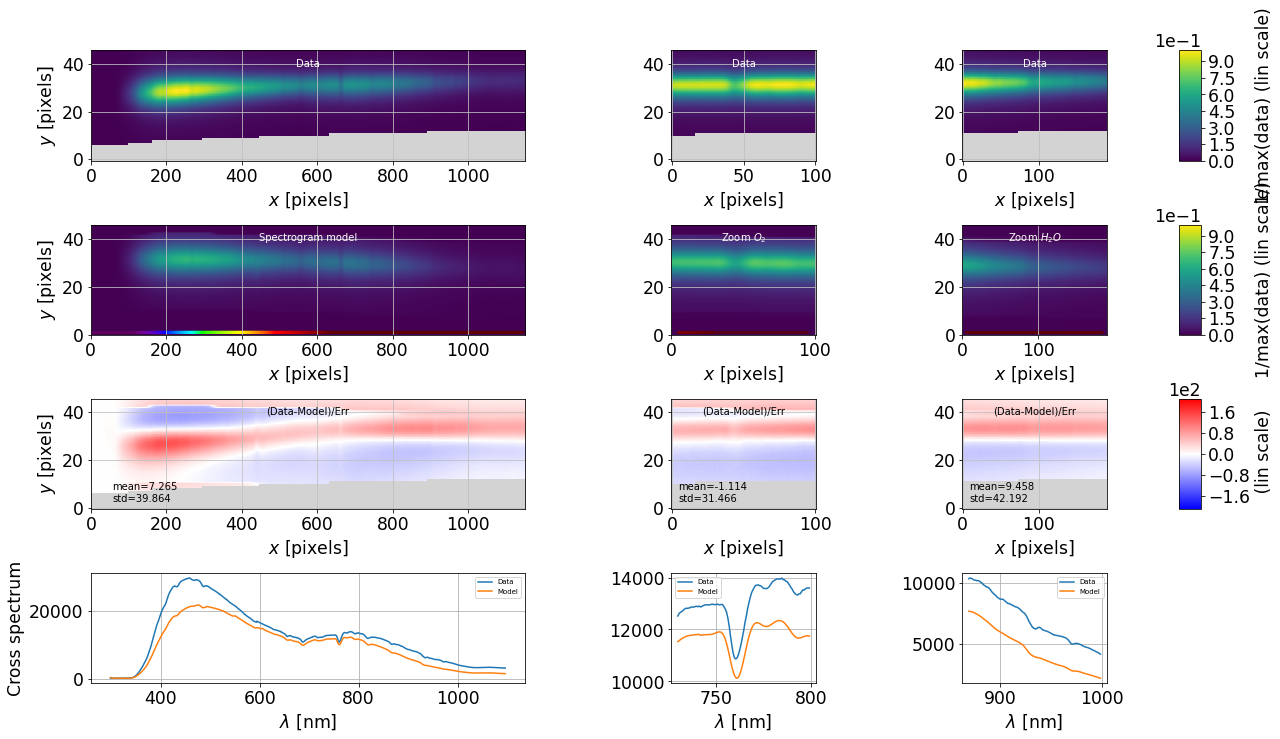

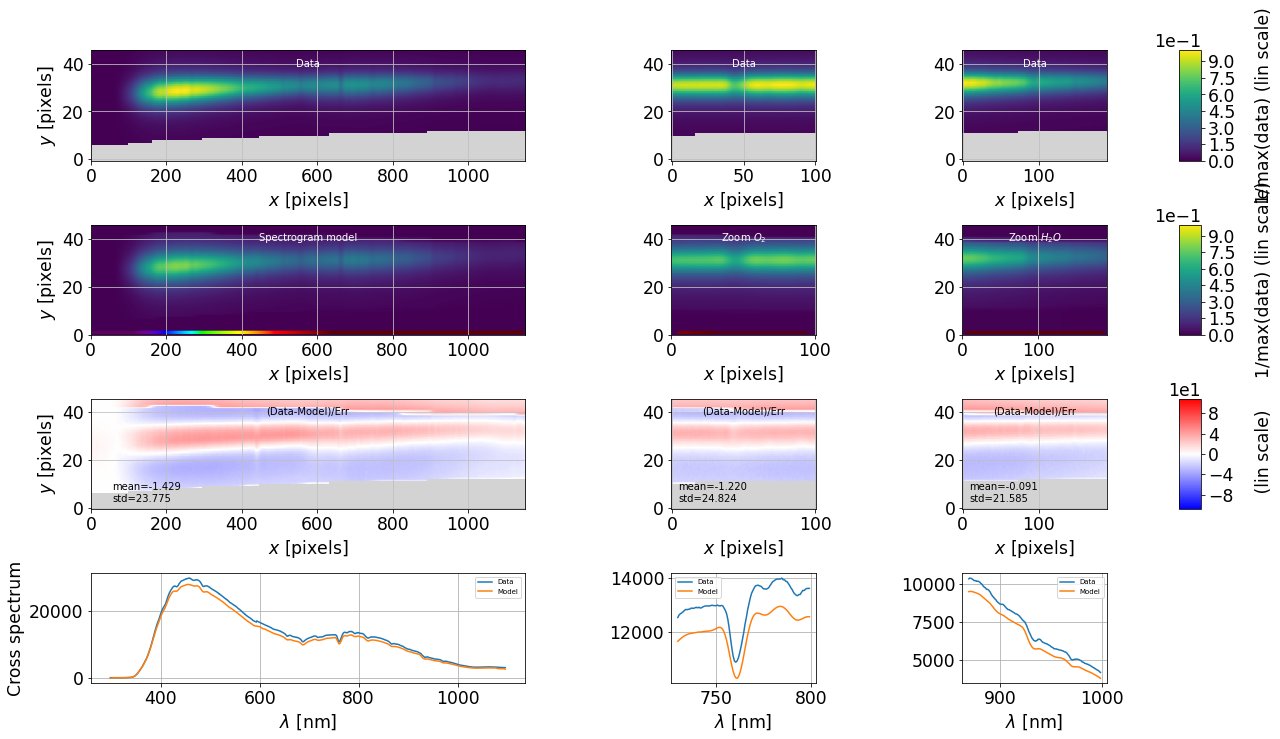

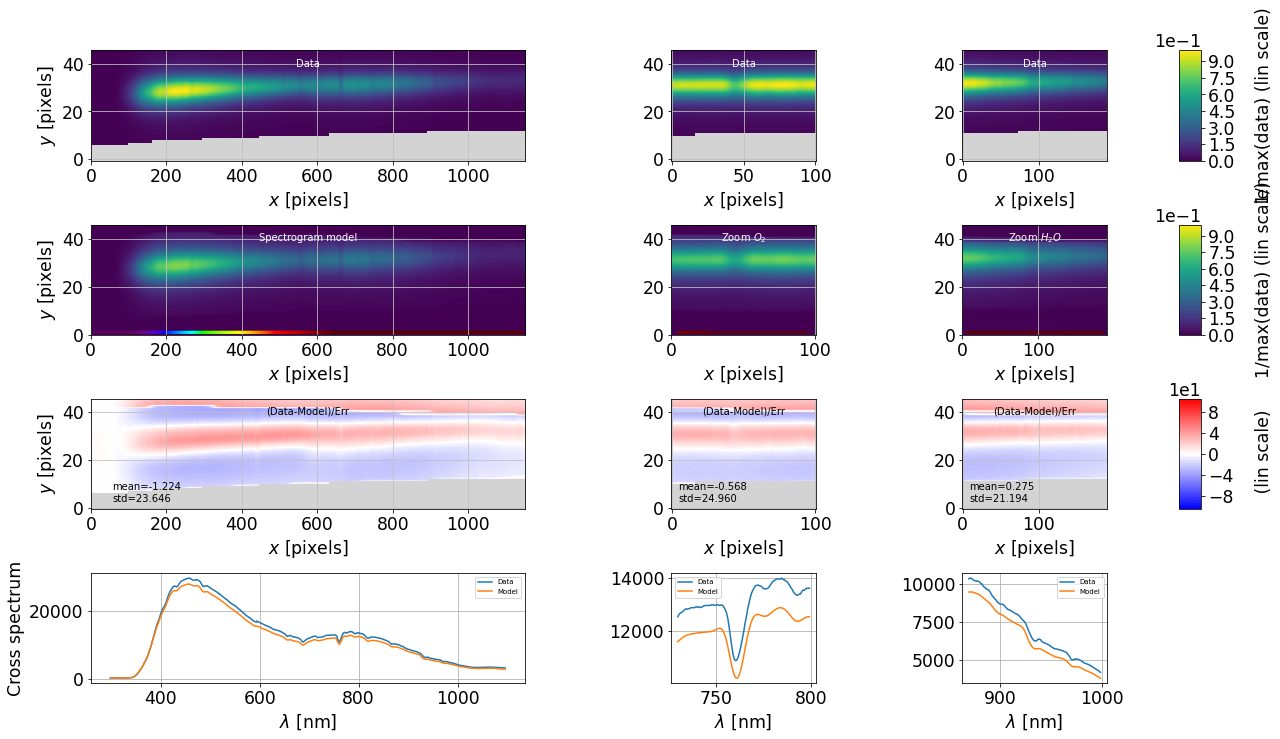

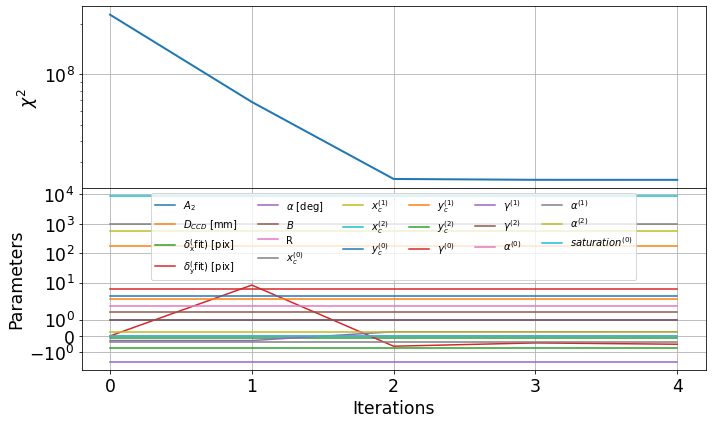

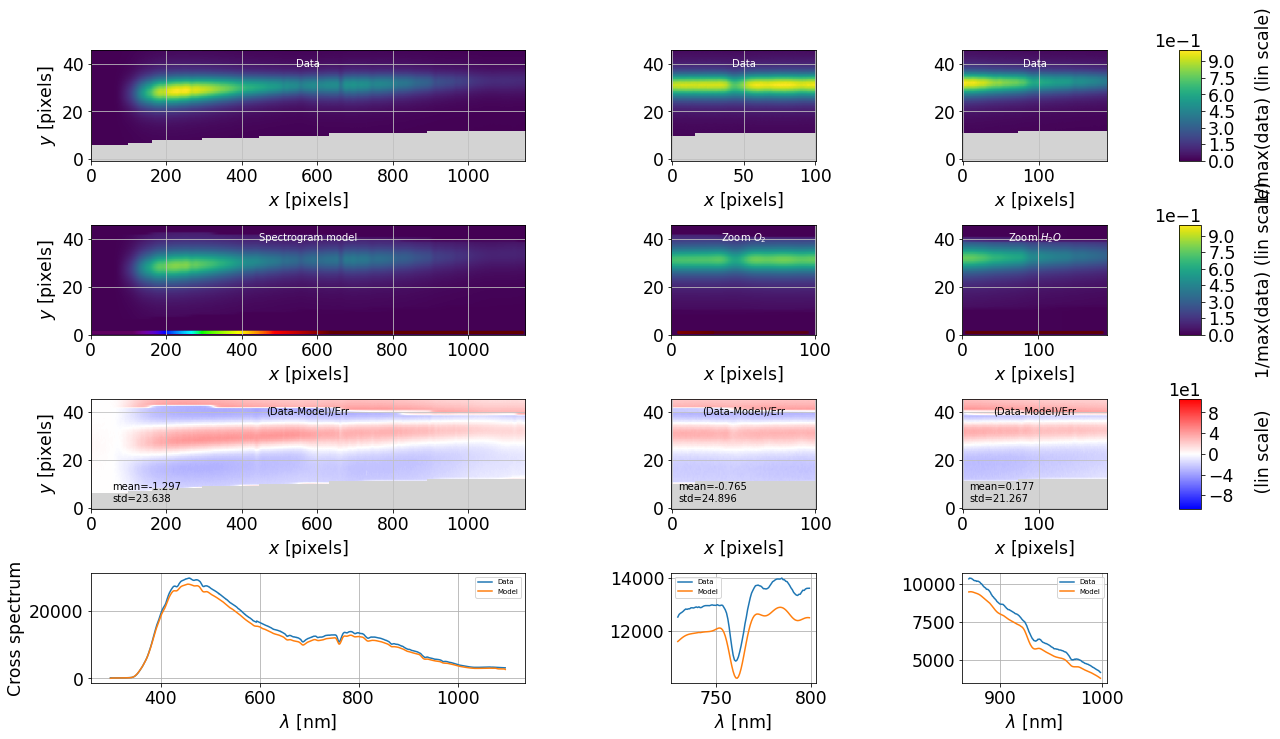

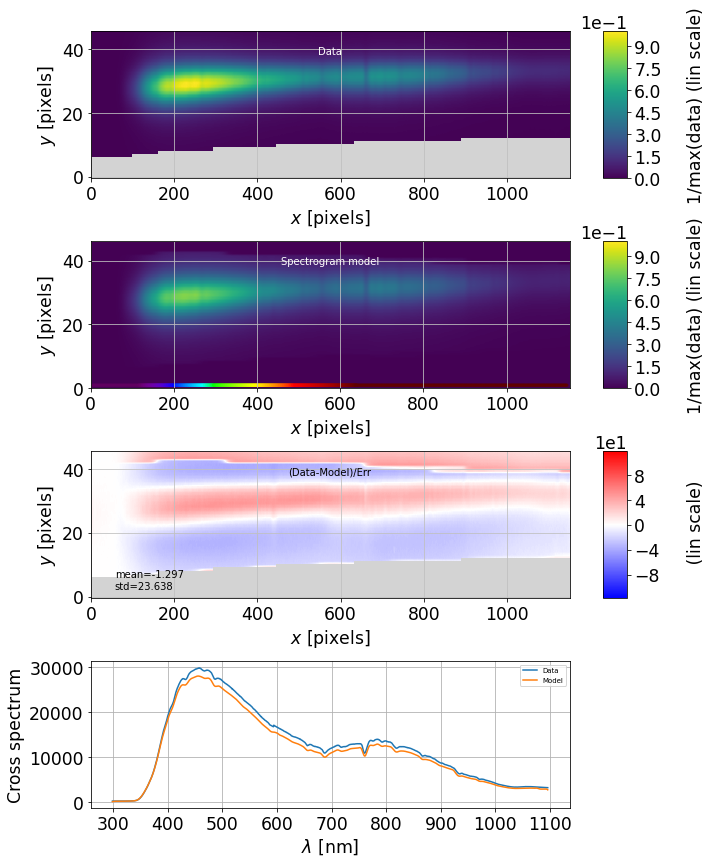

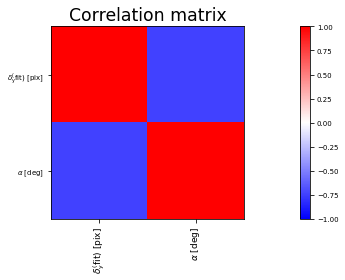

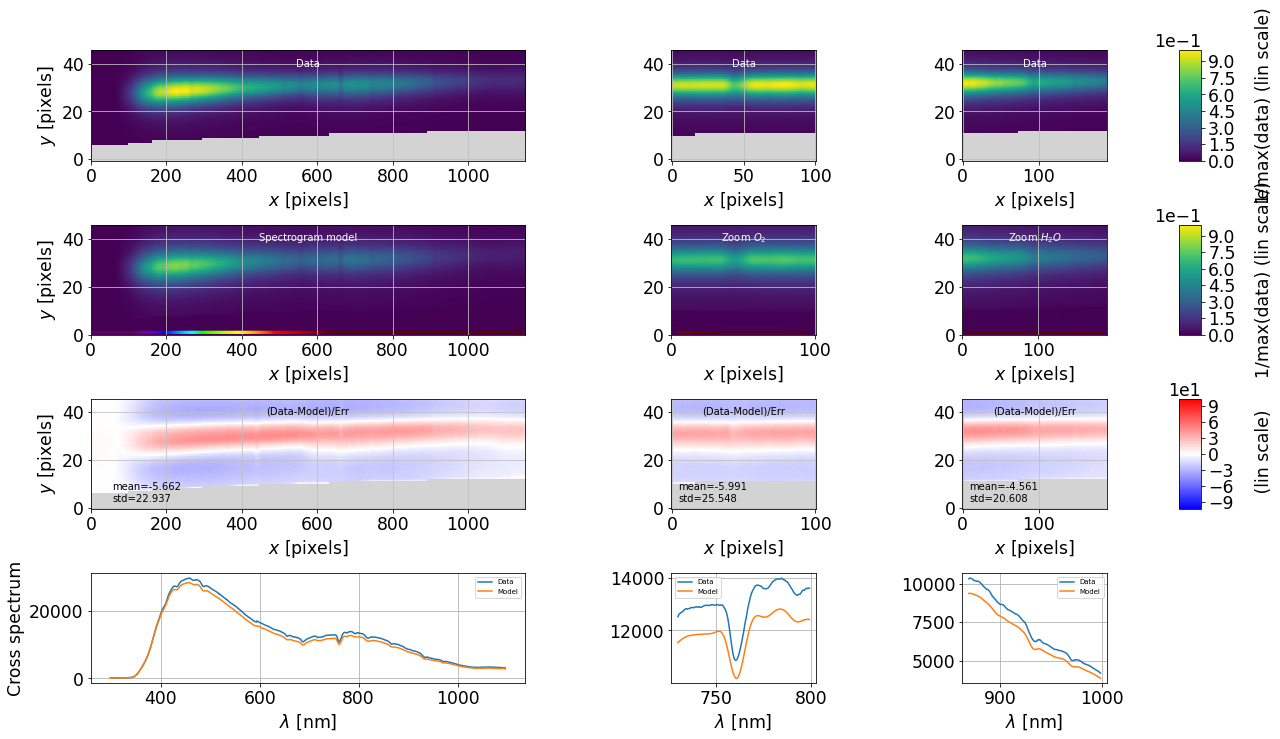

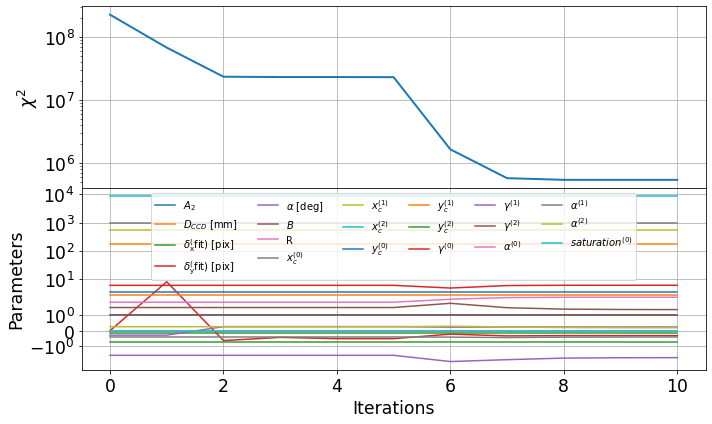

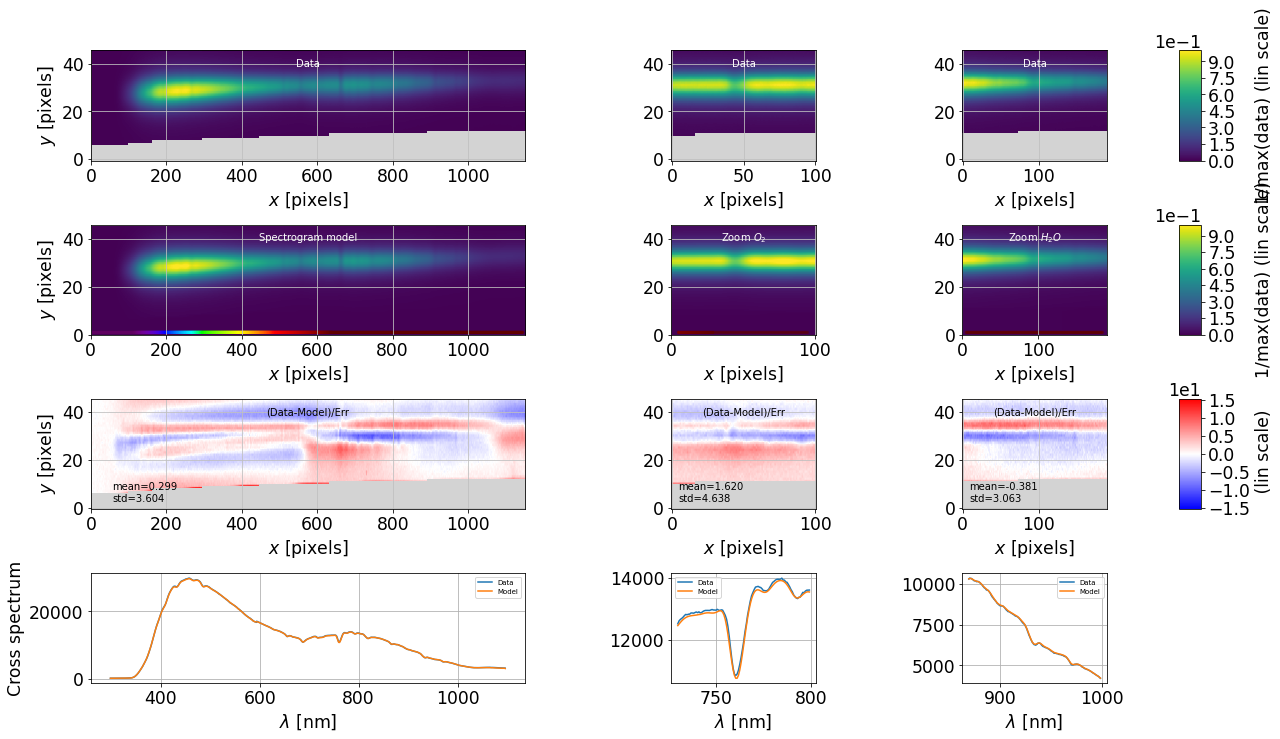

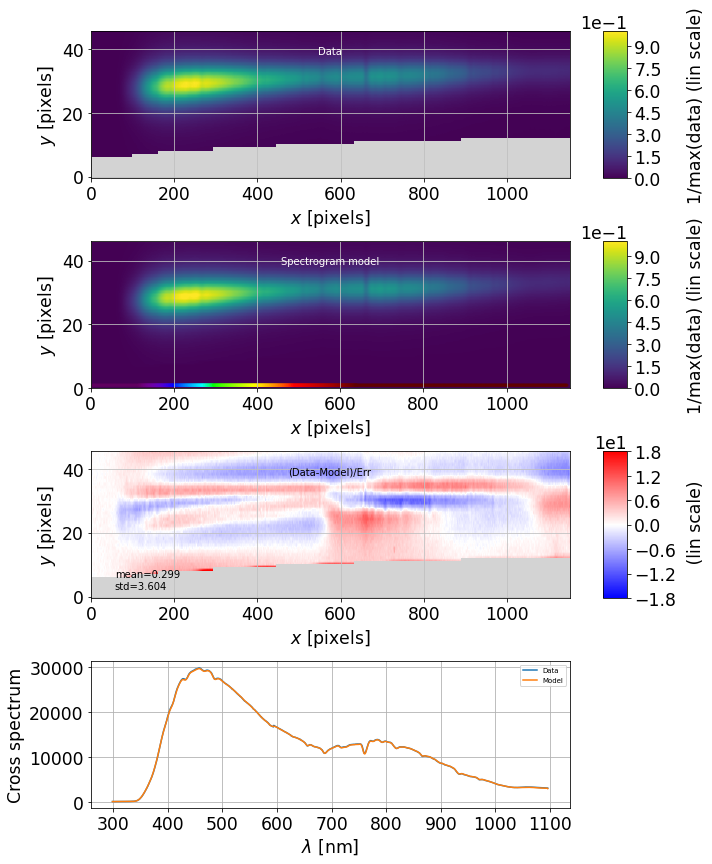

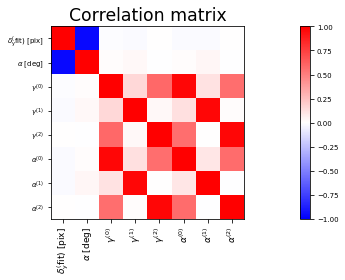

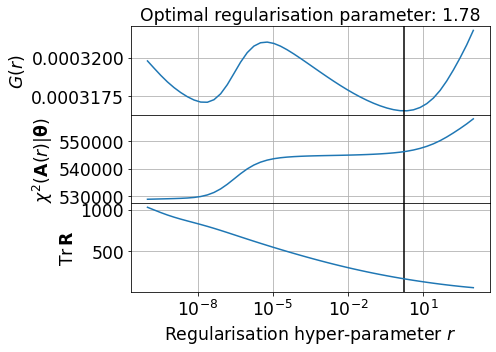

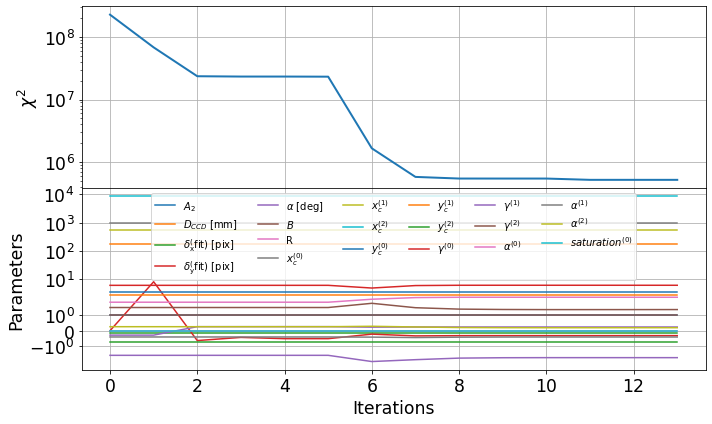

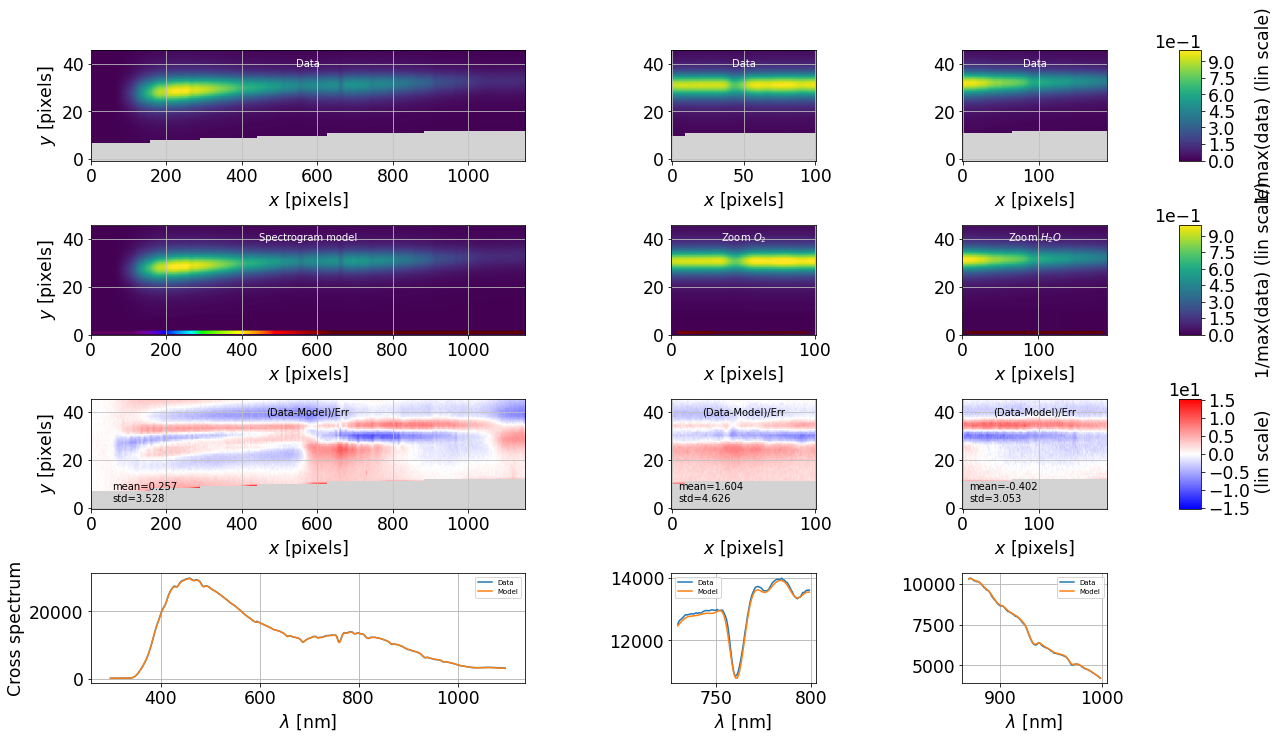

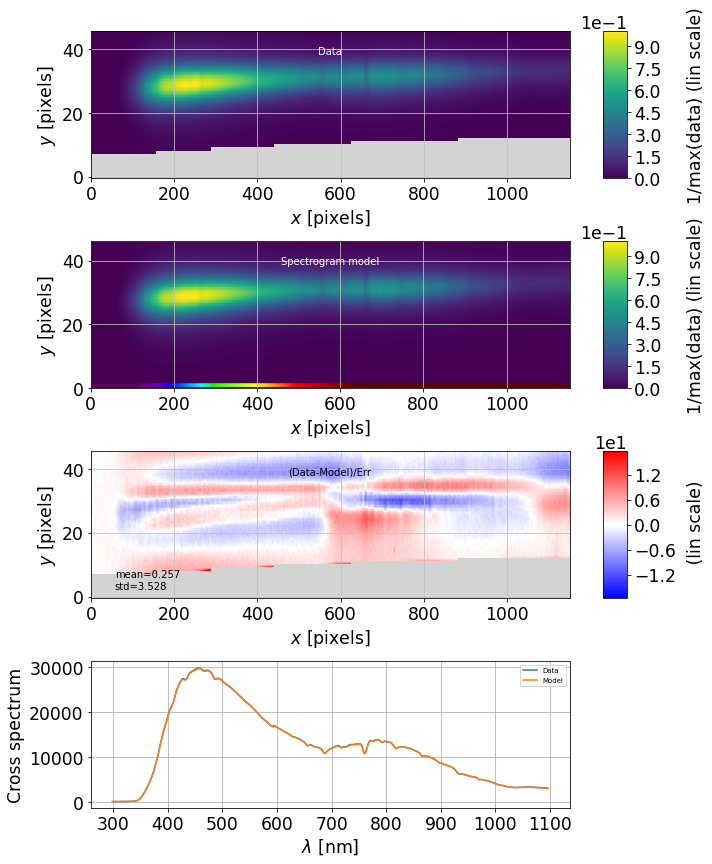

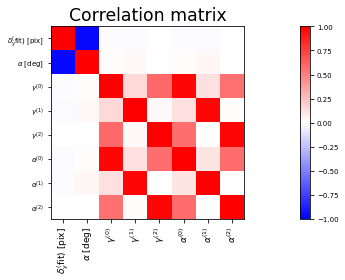

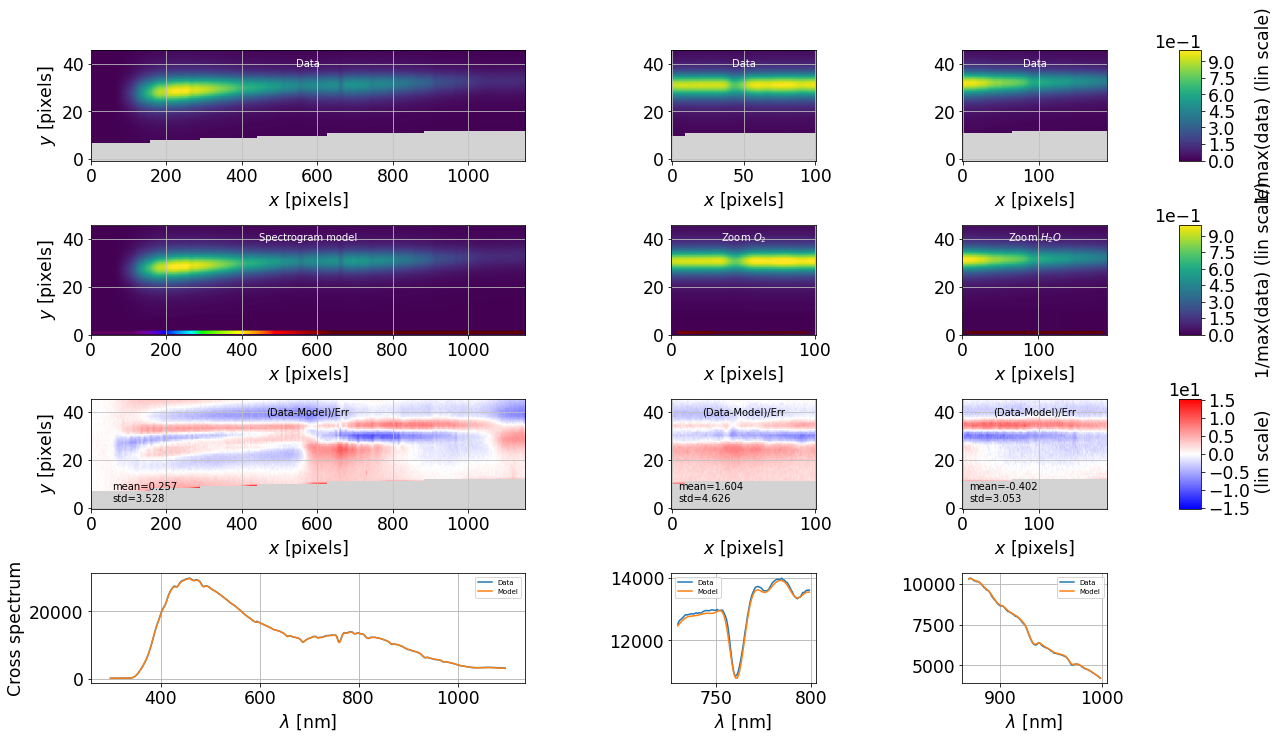

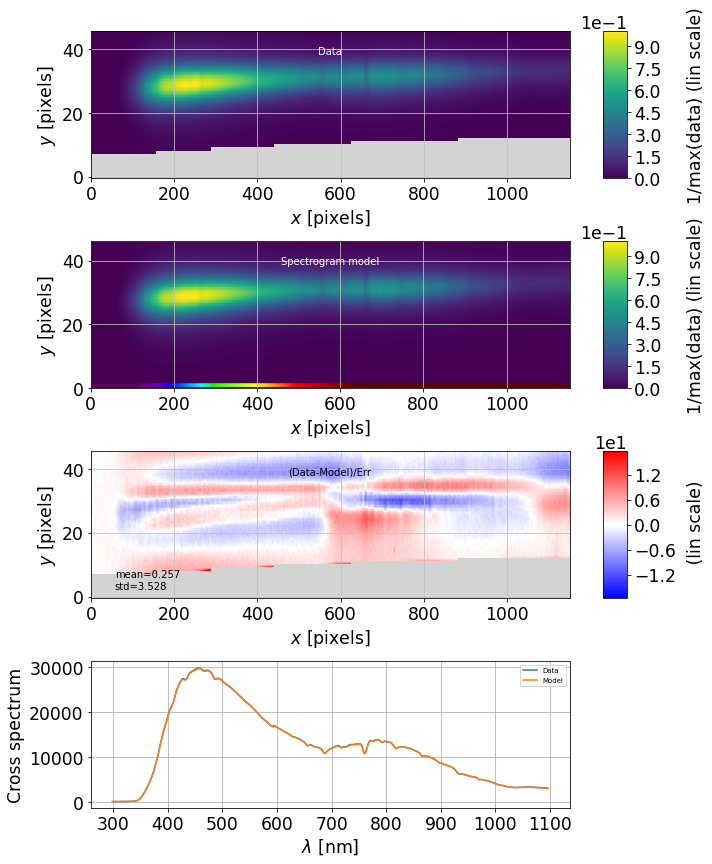

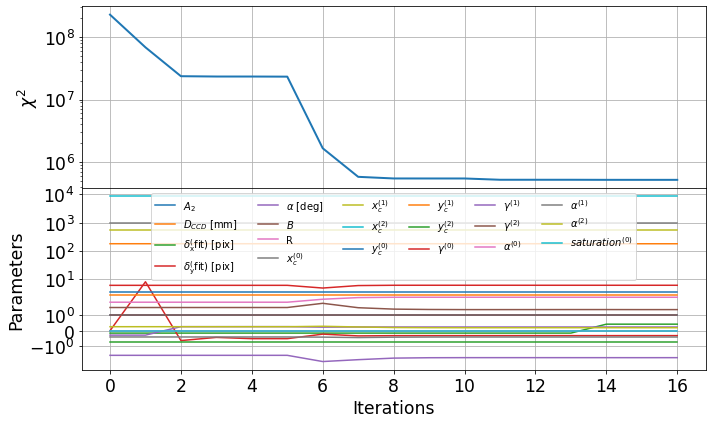

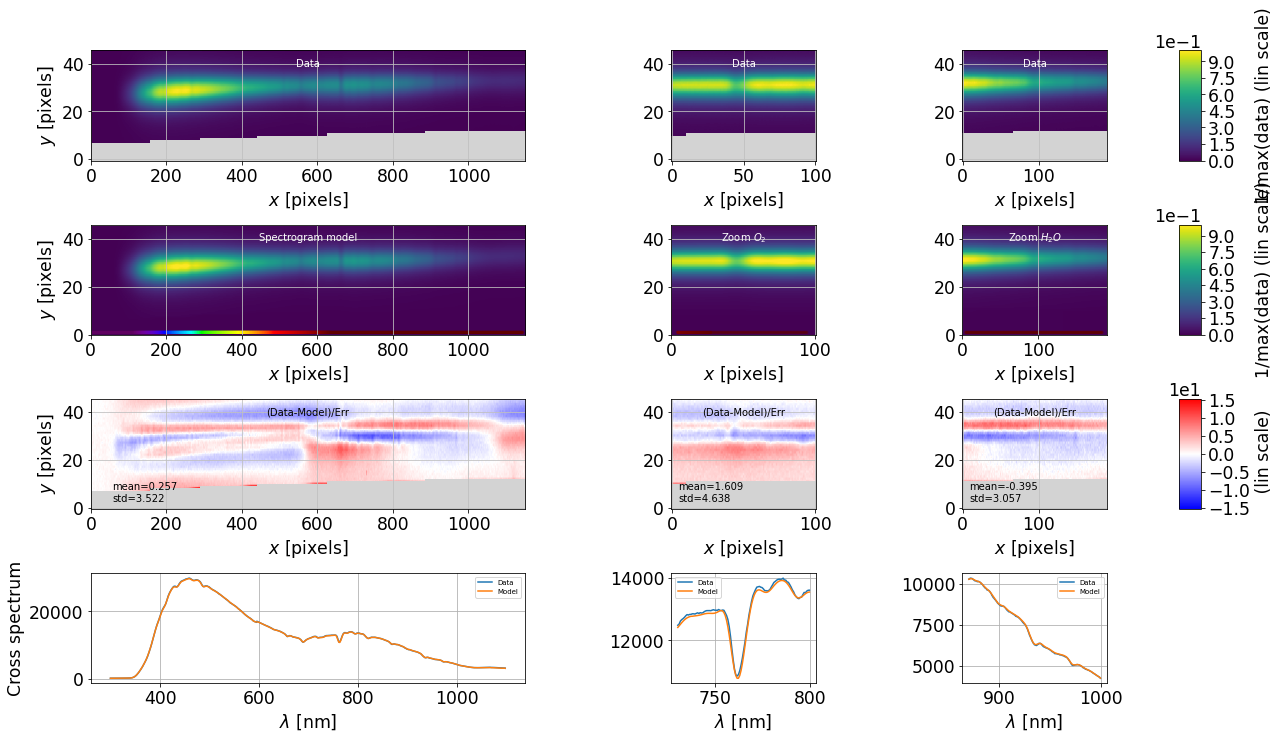

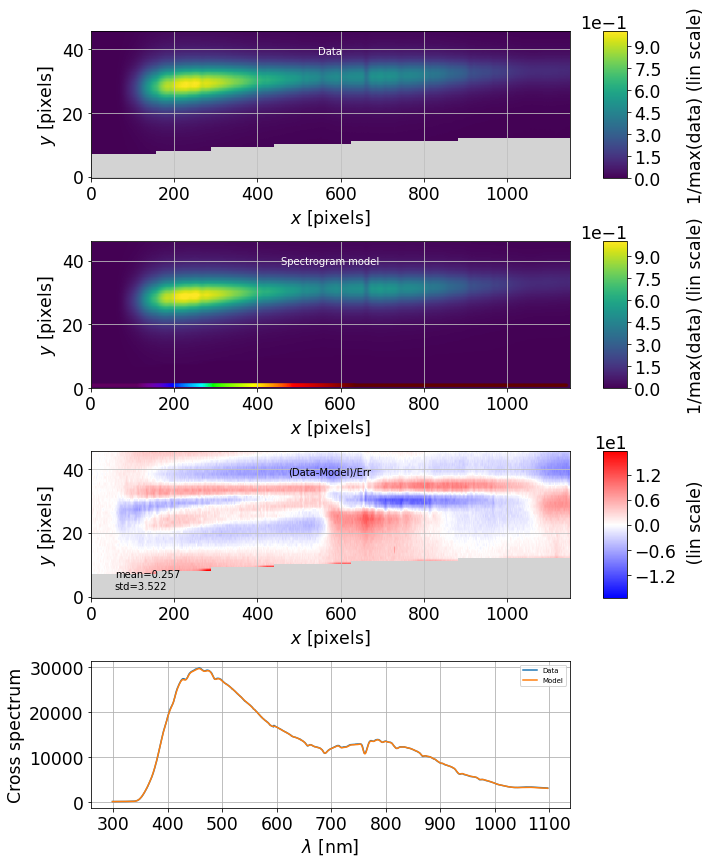

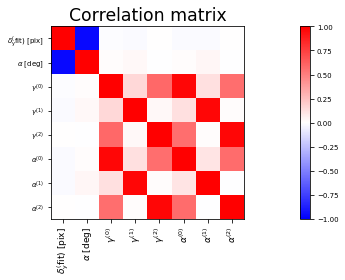

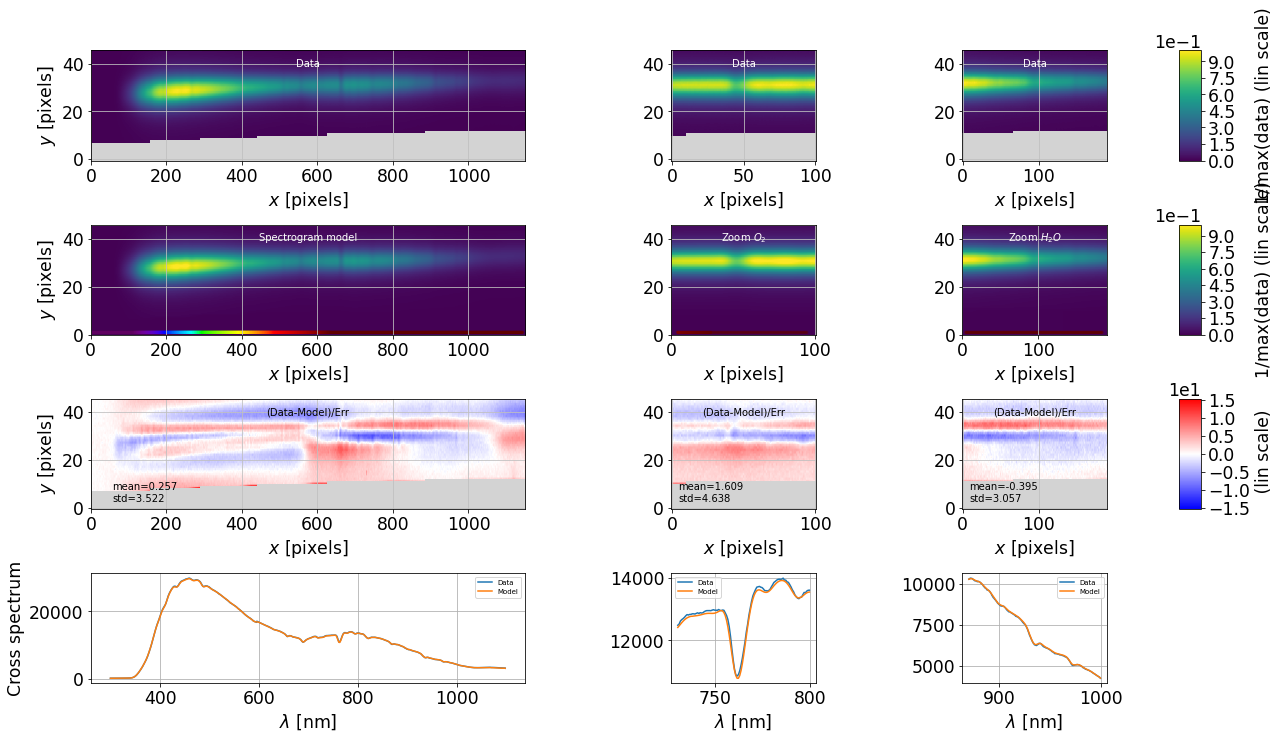

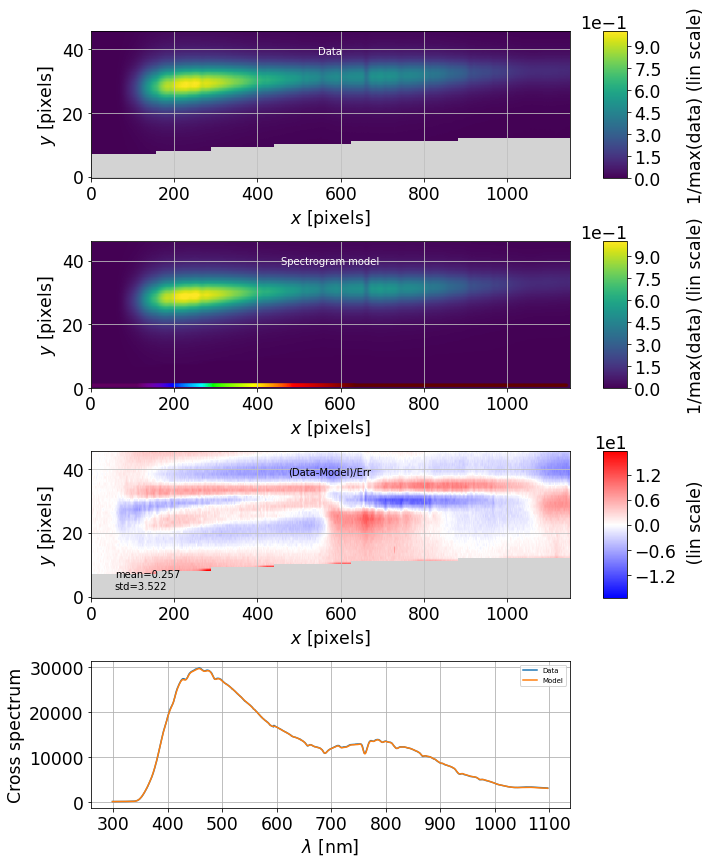

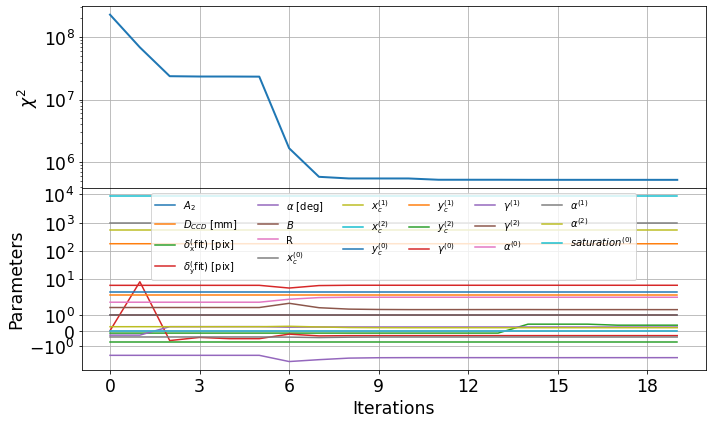

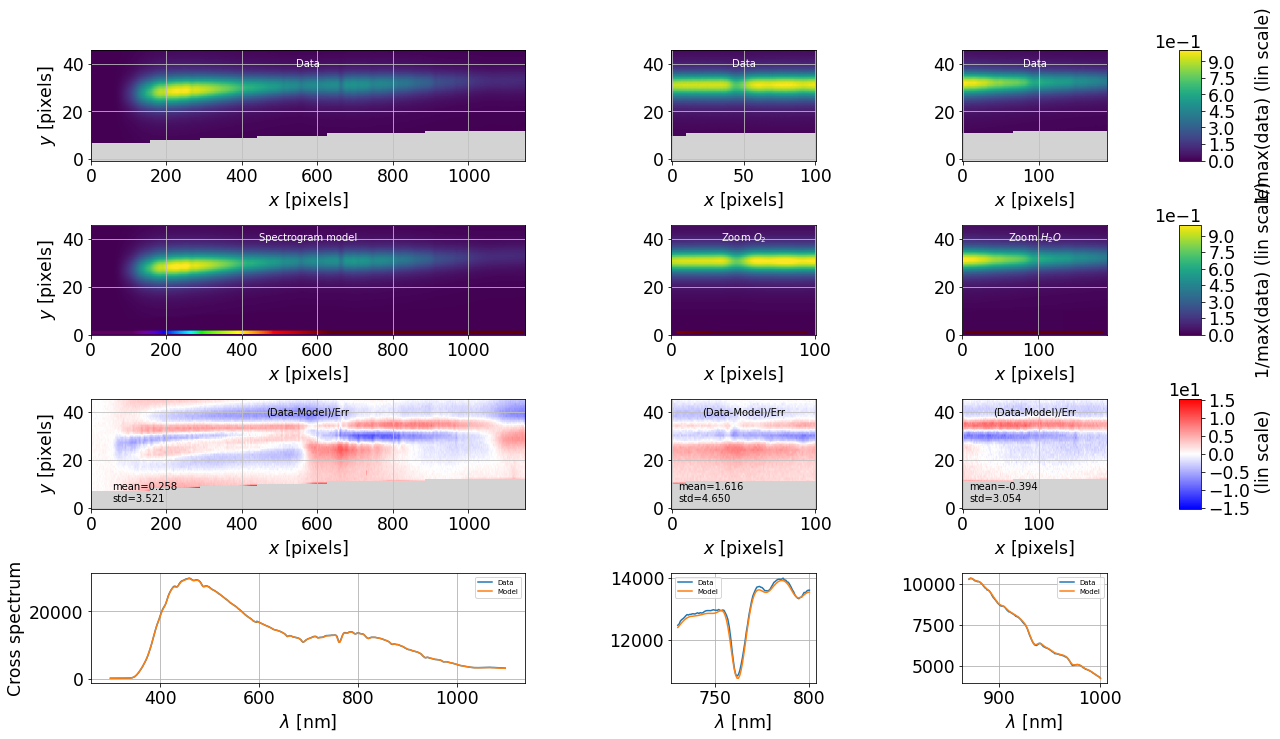

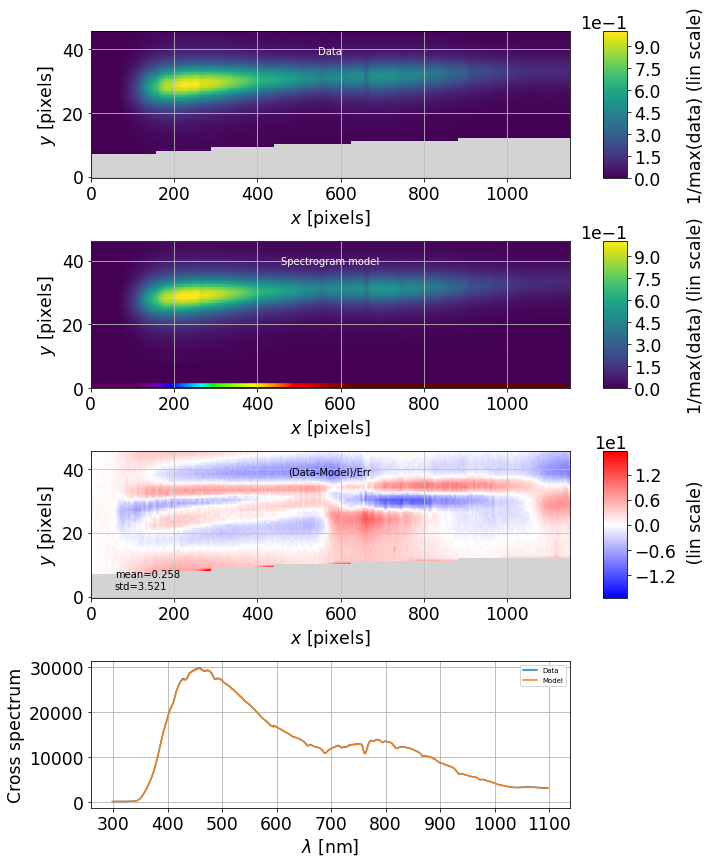

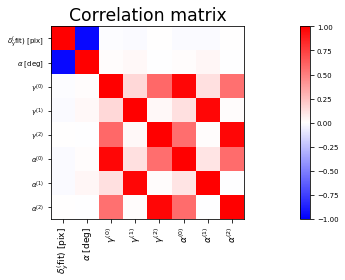

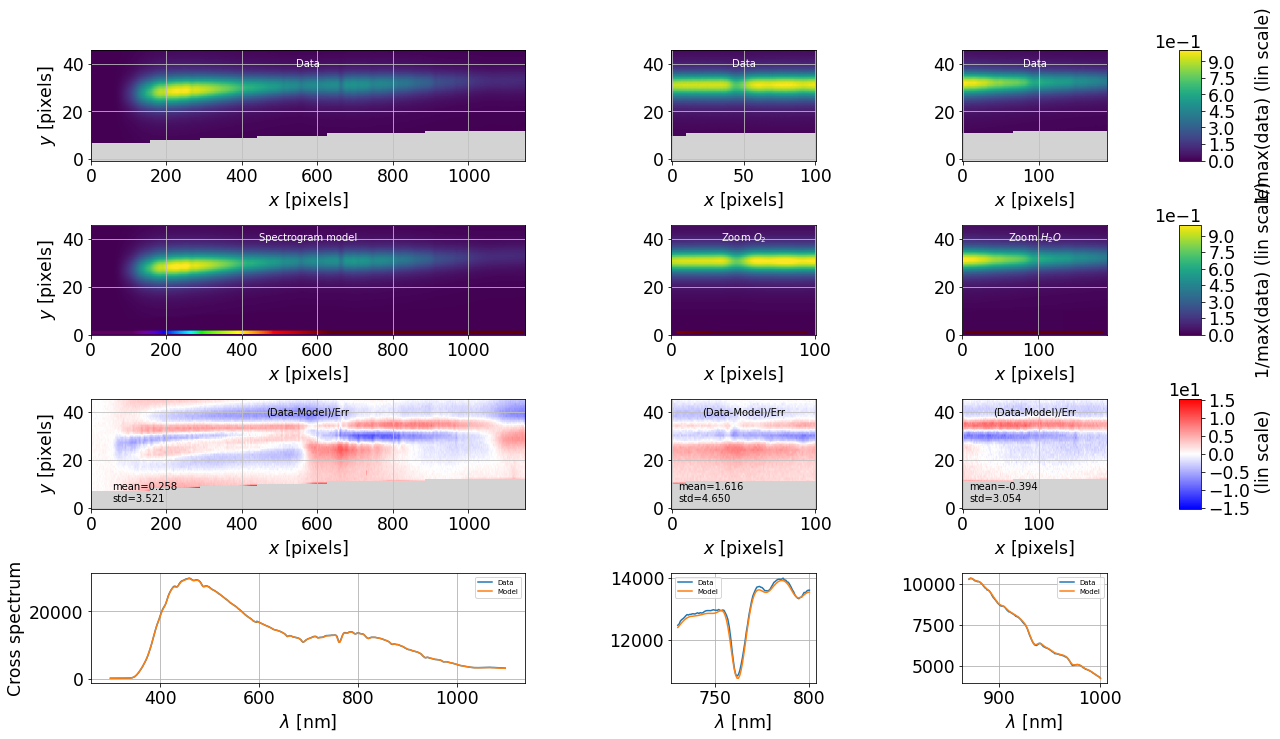

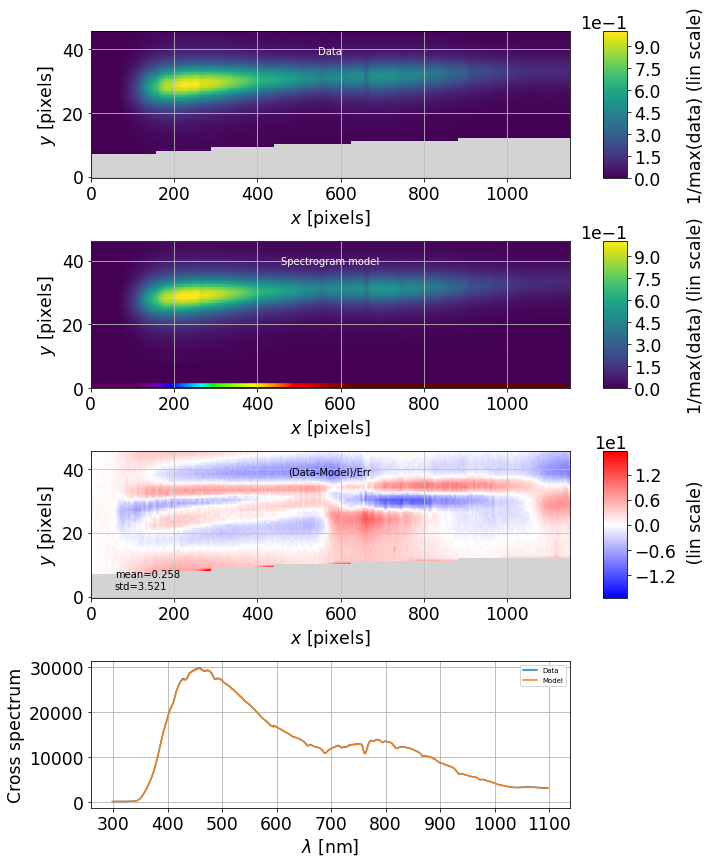

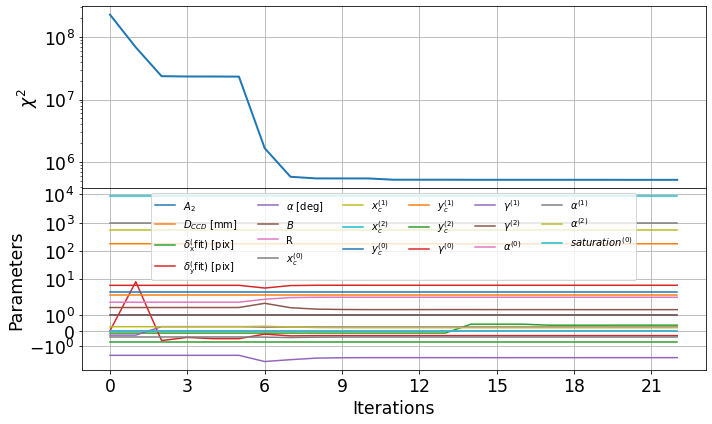

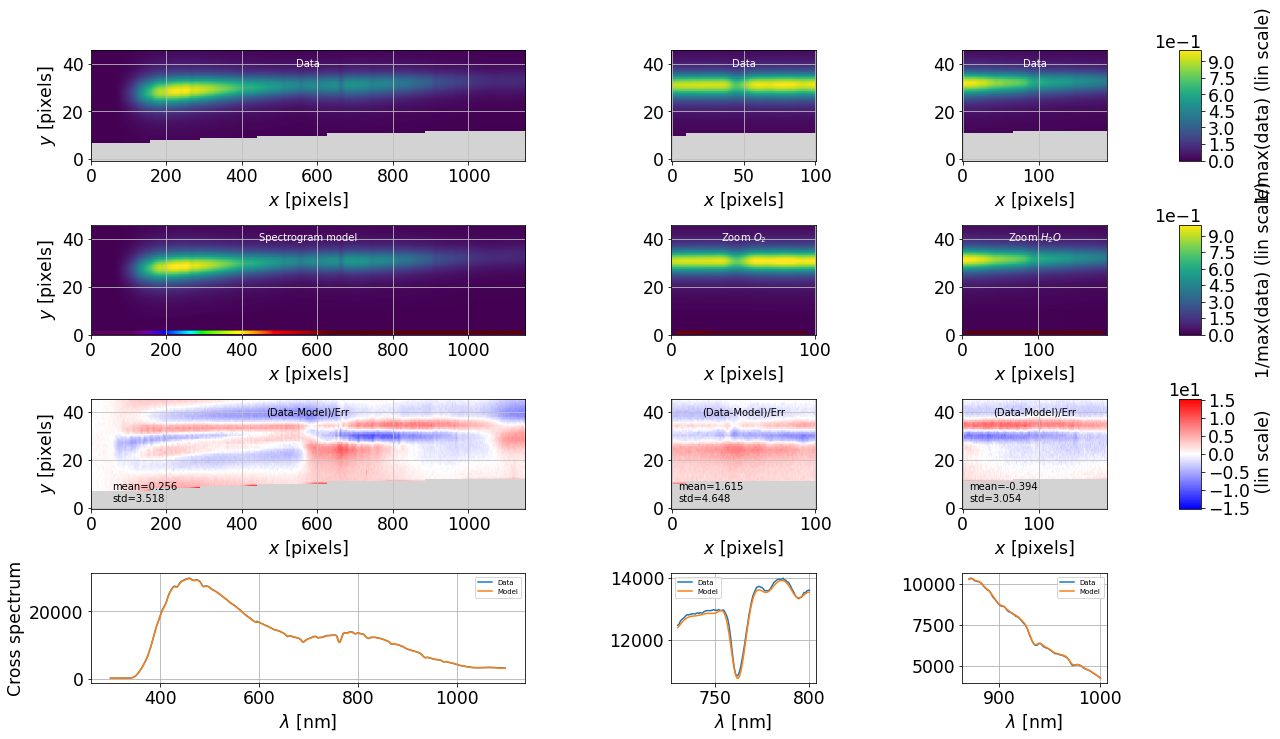

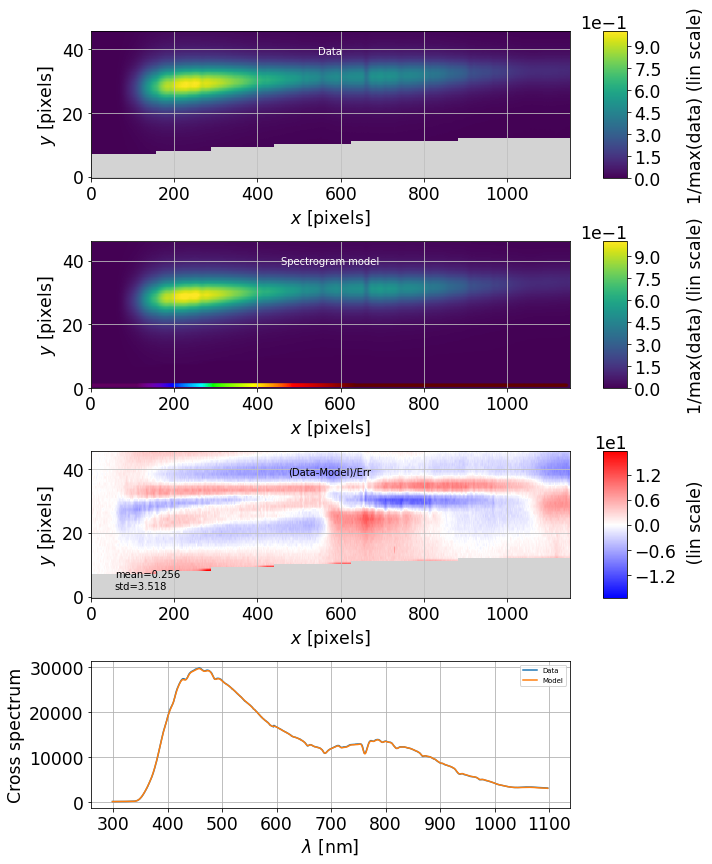

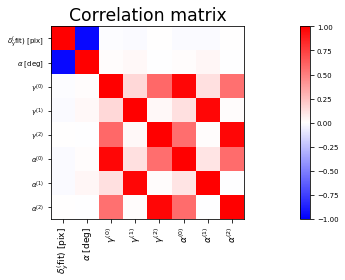

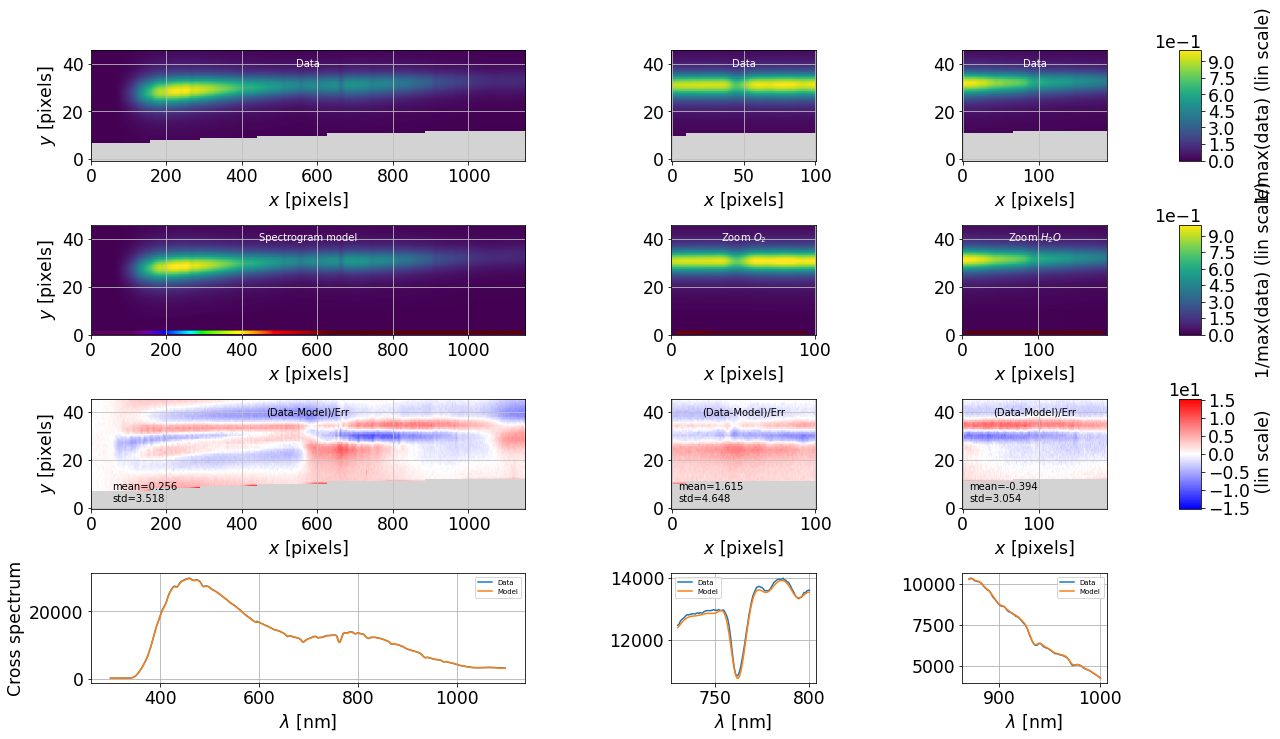

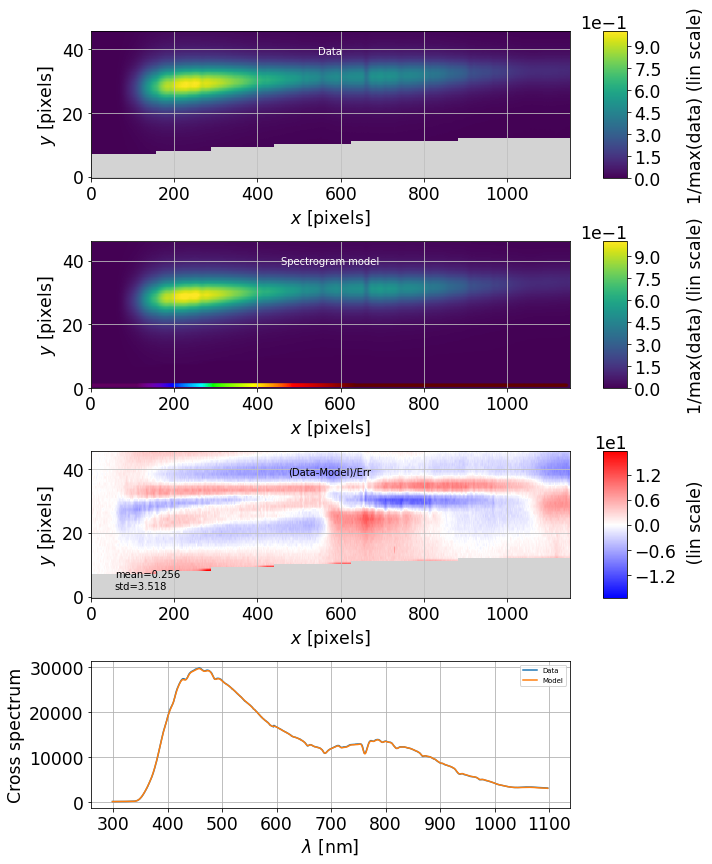

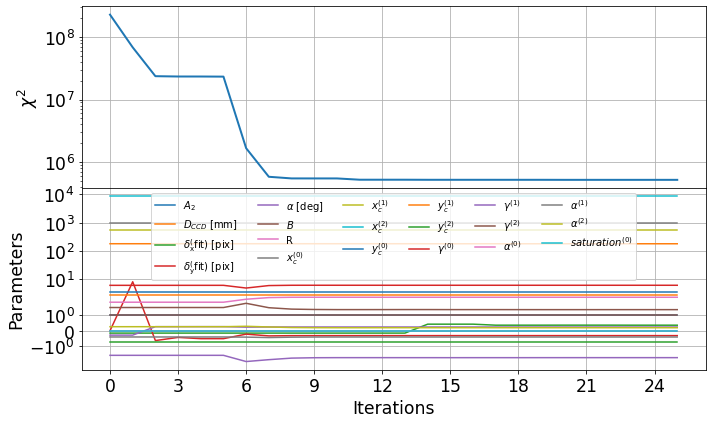

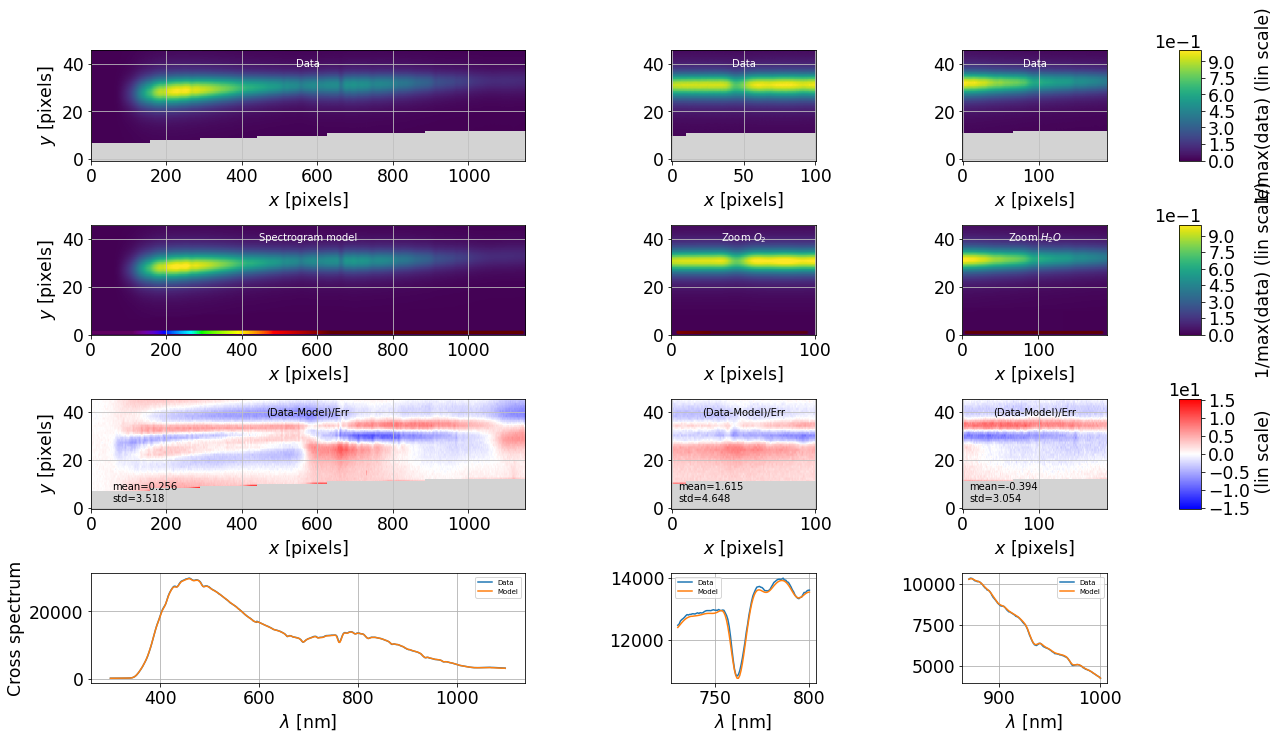

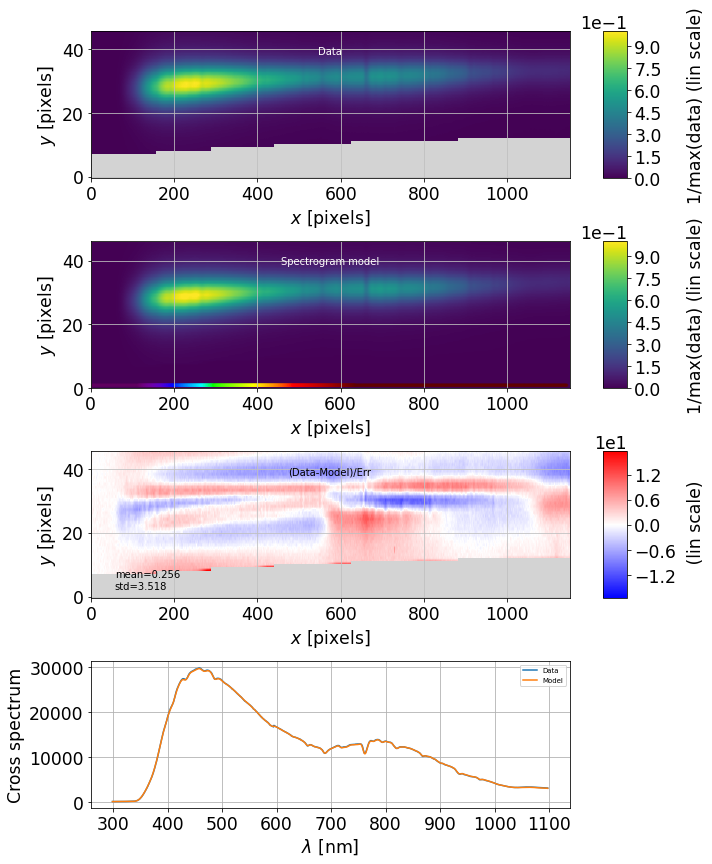

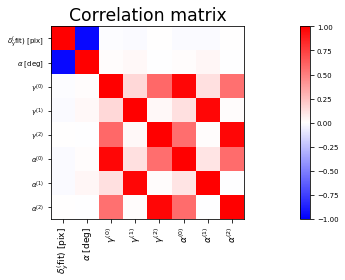

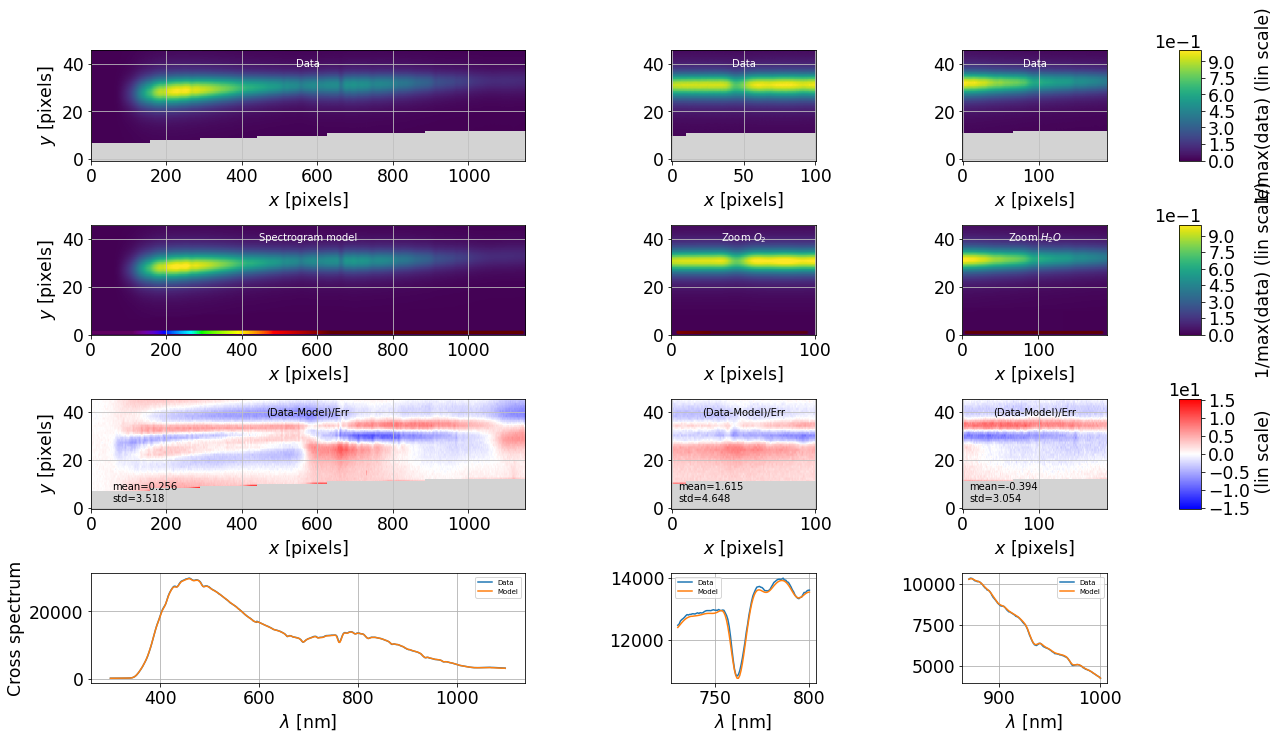

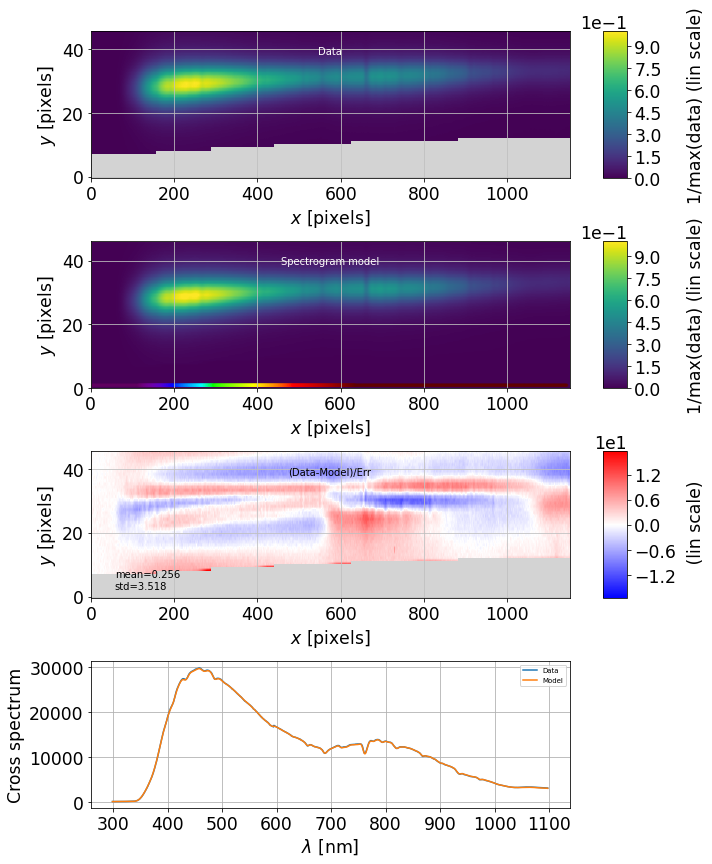

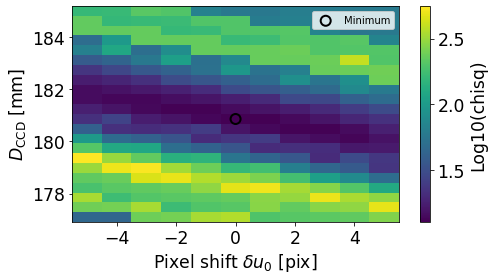

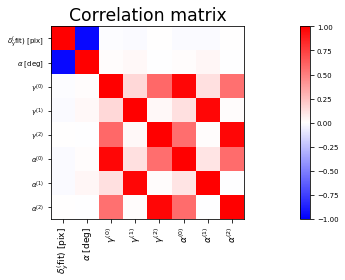

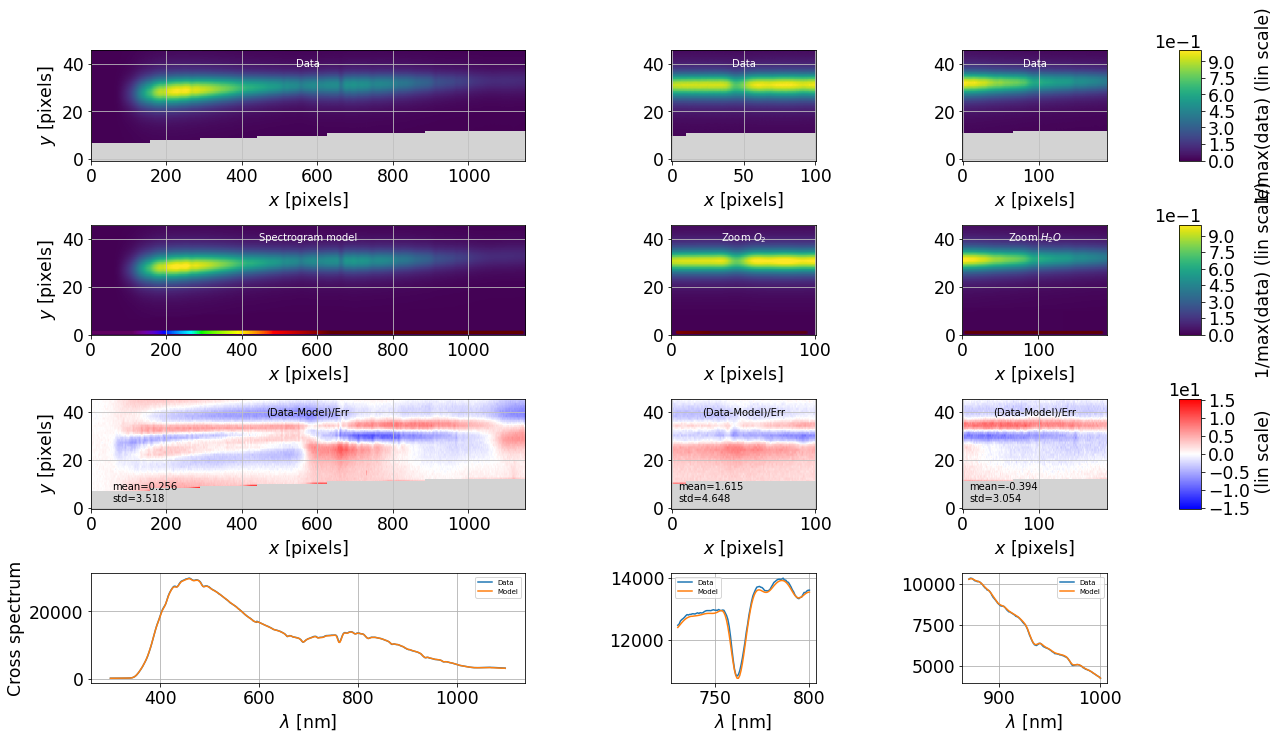

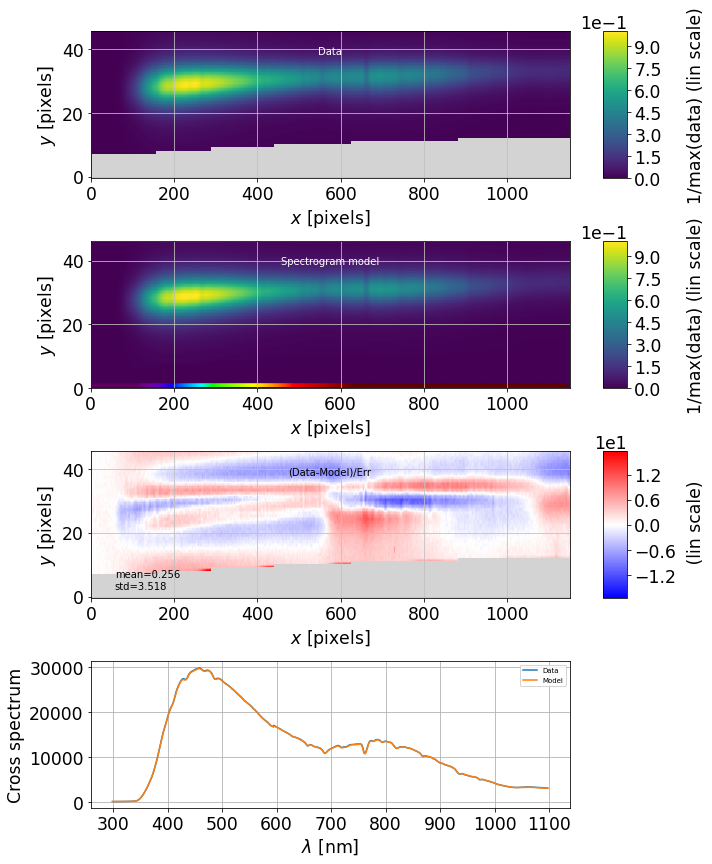

In [59]:
# increase the nulber of iteration
spectrum = run_ffm_minimisation(w, method="newton", niter=5)

   Line   Tabulated  Detected ...   Chisq   Eqwidth_mod Eqwidth_data
              nm        nm    ...  reduced       nm          nm     
--------- --------- --------- ... --------- ----------- ------------
$H\delta$  410.3493 410.59604 ...  38.89849  0.45243084   0.52660733
 $Fe_{I}$  430.9468 432.11765 ...  38.89849  0.06842869   0.30543855
$H\gamma$   434.158  434.5053 ...  38.89849  0.19970033   0.40846202
 $Fe_{I}$ 438.51456 437.47043 ...  38.89849  0.14590402    0.4917672
 $He_{I}$ 447.26276 447.57056 ...  38.89849  0.21211837    0.6980399
 $H\beta$ 486.47702 486.88098 ...  38.89849   0.2813555   0.16966435
$H\alpha$  656.5389 656.24664 ... 19.698006   0.2470058   0.29437518
 $O_2(B)$   687.472 688.38306 ... 19.698006   0.7806035    0.7377405
              760.3  759.8625 ...  28.42596  0.98206687    3.0348961
    $O_2$     763.1 763.08295 ...  28.42596    2.116512    3.0498822
 $O_2(Z)$   822.696 818.11536 ... 23.027128   1.5884827    1.6267196
 $O_2(Y)$   898.765   899.259 ... 

2022-06-28 16:17:39  astropy    _showwarning         WARNING UnitsWarning: 'reduced' did not parse as fits unit: At col 0, Unit 'reduced' not supported by the FITS standard.  If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html


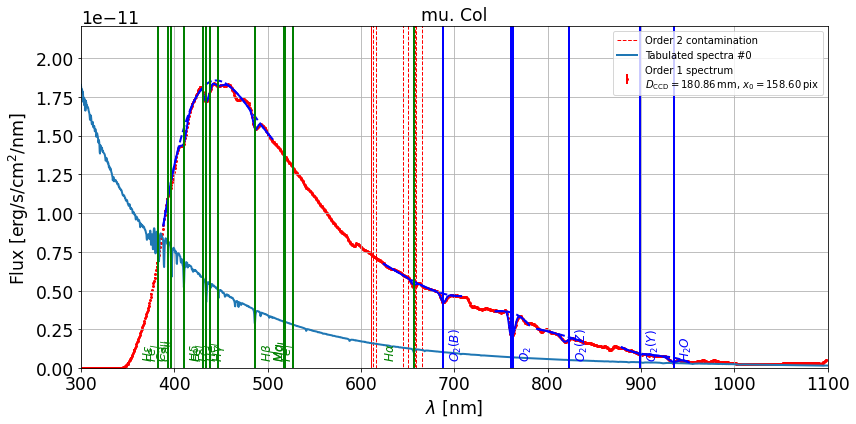

In [62]:
s.plot_spectrum(force_lines=True) 

In [64]:
s.lambdas

array([ 298.73933451,  299.44596746,  300.15258967, ..., 1097.32957328,
       1098.00777901, 1098.68594693])

In [66]:
s.data_order2

array([-202.31212609, -178.65162864, -156.11891721, ...,   55.86535527,
         58.47780271,   59.43025774])

(300.0, 1050.0)

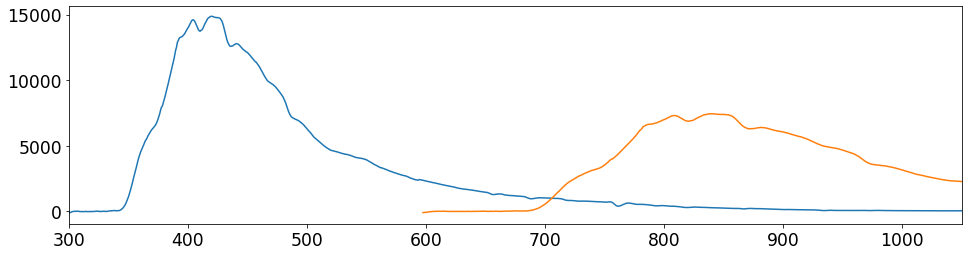

In [71]:
plt.plot(s.lambdas,s.data_order2)
plt.plot(2*s.lambdas,s.data_order2/2)
plt.xlim(300,1050)

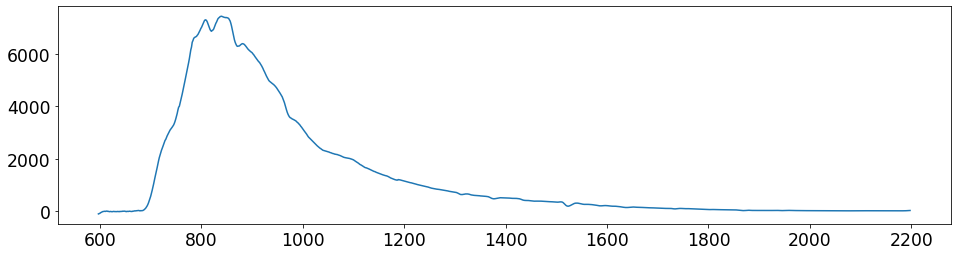

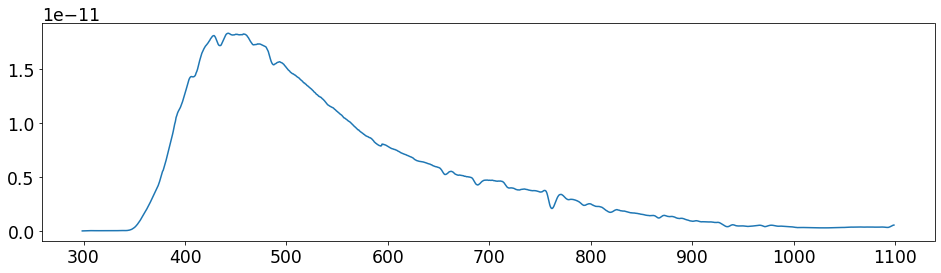

In [68]:
plt.plot(s.lambdas,s.data)